In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [3]:
data=10000
batch=100
set=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
c_reg1=0.03
c_reg2=0.0001
d=2

m^2= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=4.3314838949882795>
lam= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.6105007340370456>
alpha= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.10237557833579991>
beta= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.2431401527106294>
<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([2.56836896, 1.55241757, 2.73056358, 2.62849049, 0.53729374,
       4.07447513, 2.42967367, 2.38932056, 1.49010873, 0.12097821])>


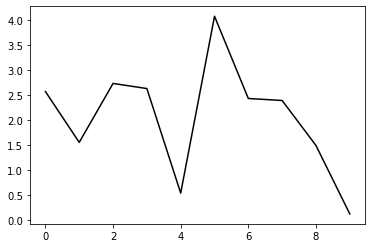

In [4]:
h=tf.zeros(layer)
h_in=[]
for i in range (layer):
    h_inn=np.float64(np.random.normal(2, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
m2=tf.Variable(np.float64(np.random.normal(2, 1)))
lam=tf.Variable(np.float64(np.random.normal(1, 1)))
alpha=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
beta=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
#m2=tf.constant(np.float64(5.6))
#lam=tf.constant(np.float64(0.61))
#alpha=tf.constant(np.float64(1.444635))
#beta=tf.constant(np.float64(0.00615))
print("m^2=", m2)
print("lam=", lam)
print("alpha=", alpha)
print("beta=", beta)
print(h)
plt.plot(h.numpy(), 'k-')
plt.show()

In [5]:
def F_func(m, la, a,b):
    return 2*b/n_fin-m*a-la*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [6]:
x=[i*0.2 for i in range (30)]
y=[0.0, 0.018, 0.035, 0.053, 0.0715, 0.0895, 0.107, 0.125, 0.146, 0.1665, 0.1875, 0.2085, 0.229, 0.25, 0.265, 0.281, 0.296, 0.3115, 0.3275, 0.343, 0.3565, 0.385, 0.4375, 0.5, 0.6, 0.675, 0.735, 0.815, 0.865, 0.885]
y[:]=[2*v for v in y]
fp1 = np.polyfit(x, y, 15)
print(fp1)

[ 1.59046394e-05 -6.81729682e-04  1.31412795e-02 -1.50525136e-01
  1.14052774e+00 -6.02241647e+00  2.27455168e+01 -6.20704699e+01
  1.22166922e+02 -1.71187074e+02  1.66428955e+02 -1.07461552e+02
  4.28229887e+01 -9.20544914e+00  9.55260239e-01 -1.30911492e-04]


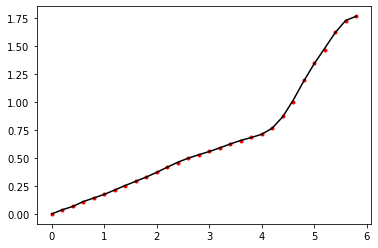

In [7]:
def f(x):
    y=0
    for i in range (16):
        y=y+fp1[i]*x**(15-i)
    return y
yy=[f(i*0.2) for i in range (30)]
plt.plot(x, y, 'r.')
plt.plot(x, yy, 'k-')
plt.show()

In [8]:
def NN_func_p(f):
    Positive=[]
    append=Positive.append
    while len(Positive)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))<=noise: append([H, M])
        else: continue
    return Positive
def NN_func_n(f):
    Negative=[]
    append=Negative.append
    while len(Negative)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))>noise: append([H, M])
        else: continue
    return Negative

In [9]:
Positive=[]
Negative=[]
for i in range (set):
    Positive.insert(i, NN_func_p(f))
    Negative.insert(i, NN_func_n(f))

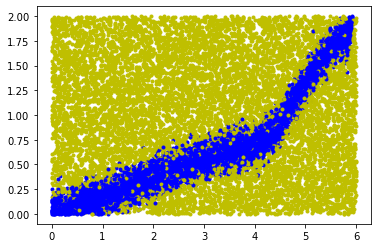

In [10]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive[i]])
    y_data1.insert(i, [v[1] for v in Positive[i]])
    x_data2.insert(i, [v[0] for v in Negative[i]])
    y_data2.insert(i, [v[1] for v in Negative[i]])
    plt.plot(x_data2[i], y_data2[i], 'y.')
    plt.plot(x_data1[i], y_data1[i], 'b.')
plt.show()

In [11]:
def Dfunc(hh, m):
    D=tf.math.sqrt(tf.math.abs(1+4*m/(hh[0]**2)))
    return D

In [12]:
def LP2(hh, m, la, alpha, beta, HH, MM):
    D=Dfunc(hh, m)
    phi=alpha*HH+beta*MM
    pi=(d/2)*(D-1)*alpha*HH+(d/2)*(-D-1)*beta*MM
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*la*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_01(hh, m, la, alpha, beta, list_hr):
    PP=[]
    NN=[]
    H=np.array(list_hr)[:, 0]
    M=np.array(list_hr)[:, 1]
    F=np.array(tf.math.abs(LP2(hh, m, la, alpha, beta, H, M)[1]))
    for i in range (len(H[F<0.1])):
        PP.append([H[F<0.1][i], M[F<0.1][i]])
    for i in range (len(H[F>=0.1])):
        NN.append([H[F>=0.1][i], M[F>=0.1][i]])
    return PP, NN

In [13]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[1])

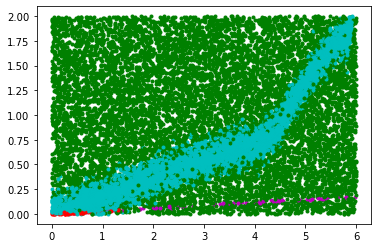

In [14]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [15]:
def Error_func(hh, m, la, alpha, beta, list1, list2):
    H0=np.array([v[0] for v in list1])
    M0=np.array([v[1] for v in list1])
    H1=np.array([v[0] for v in list2])
    M1=np.array([v[1] for v in list2])
    H_0, M_0=LP2(hh, m, la, alpha, beta, H0, M0)
    H_1, M_1=LP2(hh, m, la, alpha, beta, H1, M1)
    PPlist=t_func(M_0)
    NNlist=t_func(M_1)
    sum_p=sum(PPlist)/batch
    sum_n=(batch-sum(NNlist))/batch

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return sum_n+sum_p+E_reg1+E_reg2

In [16]:
for i in range (set):
    print(Error_func(h, m2, lam, alpha, beta, Positive[i], Negative[i]))

tf.Tensor(1.1489996031950163, shape=(), dtype=float64)
tf.Tensor(1.16571165757825, shape=(), dtype=float64)
tf.Tensor(1.1620562830277703, shape=(), dtype=float64)
tf.Tensor(1.1634782027586557, shape=(), dtype=float64)
tf.Tensor(1.1439296189779902, shape=(), dtype=float64)
tf.Tensor(1.153577771824986, shape=(), dtype=float64)
tf.Tensor(1.153200018336202, shape=(), dtype=float64)
tf.Tensor(1.1340838010832381, shape=(), dtype=float64)
tf.Tensor(1.1560534653104806, shape=(), dtype=float64)
tf.Tensor(1.1535883532106281, shape=(), dtype=float64)
tf.Tensor(1.1568290798011478, shape=(), dtype=float64)
tf.Tensor(1.1440099597262123, shape=(), dtype=float64)
tf.Tensor(1.1494719265059294, shape=(), dtype=float64)
tf.Tensor(1.1536778631159987, shape=(), dtype=float64)
tf.Tensor(1.15374465910887, shape=(), dtype=float64)
tf.Tensor(1.1619804576280583, shape=(), dtype=float64)
tf.Tensor(1.1536778652354787, shape=(), dtype=float64)
tf.Tensor(1.1636777317869356, shape=(), dtype=float64)
tf.Tensor(1.1538

# Optimize

0 1.143756617754114
4.323120205336433 -0.6188642807427764 -0.09401170335557456 0.2515040255806549
[2.51836898 1.60241745 2.78056266 2.67848935 0.58729344 4.02447734
 2.47967228 2.4393175  1.54010476 0.17096415]


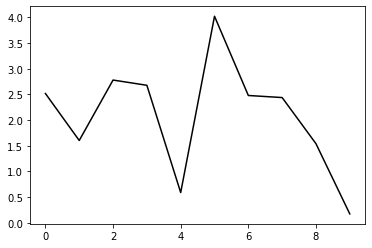

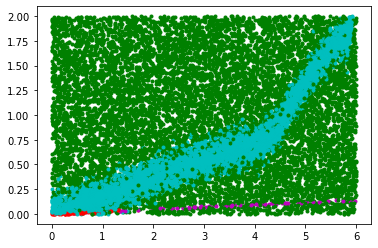

1000 1.0044606083034568
4.199988790925176 -0.6067411853771416 -0.04172226411630237 0.24986540693963474
[1.76192192 1.91860217 2.06877818 2.1915016  2.29402775 2.39324234
 2.51698223 2.64703959 2.64045747 4.78608107]


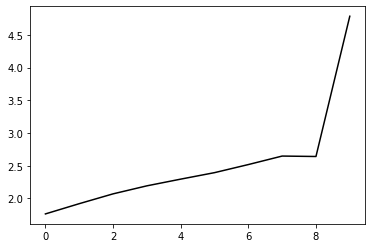

2000 0.9932997220188464
4.111640958703696 -0.606803382596216 -0.034286902914681595 0.20577560334867048
[1.90628732 1.82401895 1.72215413 1.56508441 1.4586499  1.28932954
 1.12570315 1.08605714 1.62771751 7.31547189]


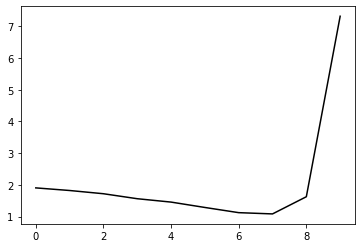

3000 1.002552736680121
4.016149655294157 -0.6069397582435457 -0.050242322482930334 0.13141214628779777
[1.68833131 1.64814206 1.62162598 1.58273775 1.51167097 1.40143426
 1.25946752 1.15859809 1.57945312 7.22584608]


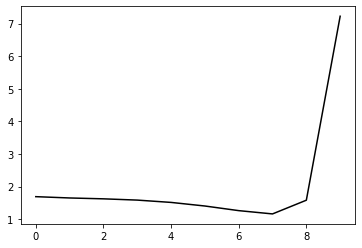

4000 0.9628560677700418
3.7523307649481334 -0.6040048793324012 0.02961292167243354 -0.05354648577307606
[ 1.57922653  1.55158206  1.48167046  1.31026645  1.04620061  0.68596749
  0.22376805 -0.24679943 -0.1312144   6.73628416]


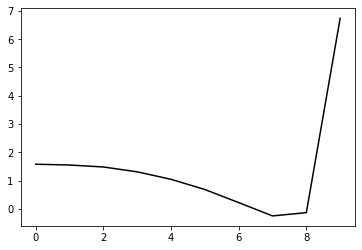

5000 1.01120380532933
3.4511436383413026 -0.6057290845229231 0.016772150240816422 -0.00045454312003593813
[ 1.58898515e+00  1.48028895e+00  1.30557071e+00  1.03352088e+00
  6.18151864e-01  2.27350801e-03 -8.34905893e-01 -1.76064363e+00
 -1.96047838e+00  6.15190445e+00]


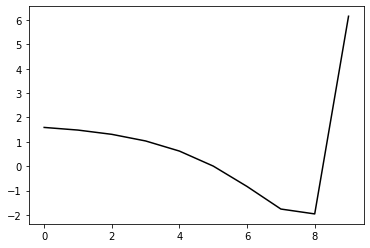

6000 0.5091916910694432
3.2957856668031944 -0.5393156874951578 -0.0823528720384007 0.04695800091185653
[ 2.21924038  1.32053563  0.66161747  0.212081   -0.17608039 -0.66520455
 -1.38774451 -2.34059122 -2.61288913  5.90796516]


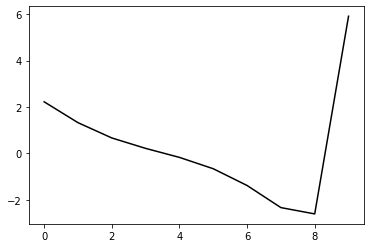

7000 0.3309275981603148
3.3390338827044013 -0.27789359468142333 -0.10580112667315075 0.05610704255779744
[ 2.41401828  1.91855022  1.37321976  0.79057844  0.19672957 -0.40273408
 -1.04515085 -1.77787241 -1.95146681  6.12132871]


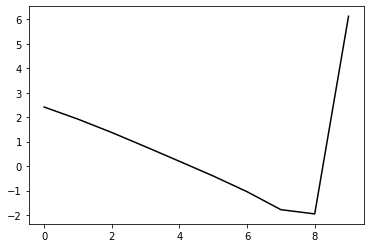

8000 0.42219351977599723
3.2554479465700203 -0.18030363429425483 -0.1030097805019472 0.0536639815657654
[ 2.48401664  2.07290795  1.60011795  1.05197515  0.41328753 -0.3303748
 -1.19909846 -2.19487445 -2.72868054  5.87137477]


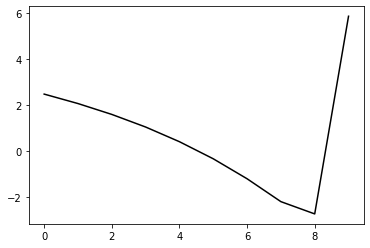

9000 0.37148247246698746
3.1828926529484804 -0.03338759251836007 -0.10390049812333808 0.05058433201168426
[ 2.57705098  2.17544945  1.75076136  1.23346379  0.5950285  -0.20857351
 -1.23000482 -2.46694409 -3.22003421  5.70397572]


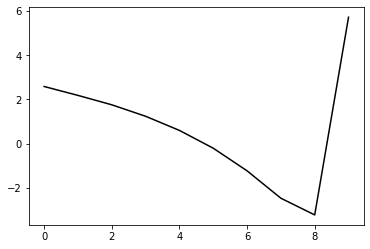

10000 0.42539349046921876
3.118371554687043 0.11352518906172411 -0.102631646793347 0.058108669402229134
[ 2.61398327e+00  2.29280348e+00  1.90209160e+00  1.42434351e+00
  8.14086968e-01  1.56215953e-03 -1.10294093e+00 -2.53577201e+00
 -3.53312384e+00  5.57011190e+00]


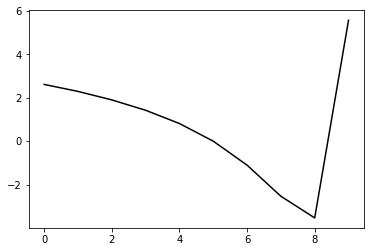

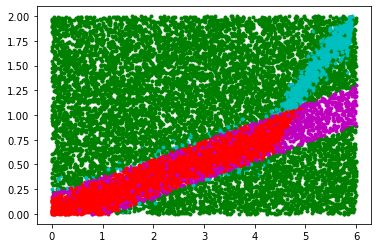

11000 0.45623959550520826
3.0585862693663426 0.23131746024878375 -0.1062619617068229 0.061460093915224646
[ 2.62243408  2.41081059  2.05683366  1.59601254  0.9928446   0.17486512
 -0.97125445 -2.53752186 -3.79938     5.50423649]


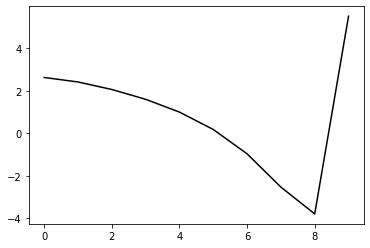

12000 0.3146702015525331
2.9718383784575457 0.35393229735954945 -0.10867793795124249 0.054367639003487386
[ 2.67930883  2.3819605   2.06788604  1.62586345  1.01922665  0.16712122
 -1.06878218 -2.84467938 -4.50237277  5.25408336]


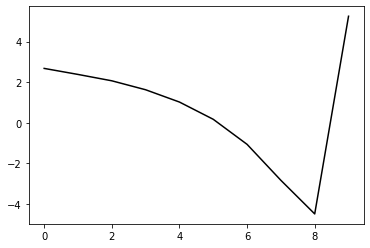

13000 0.3988458877078019
2.9435400889192405 0.4720939178330127 -0.1164404875166705 0.06244230000140016
[ 2.70572969  2.48193911  2.19534004  1.80959511  1.27135354  0.49003236
 -0.69227241 -2.48688537 -4.37298596  5.31062885]


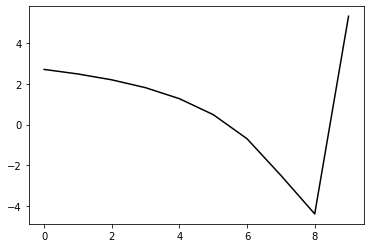

14000 0.3500895401868079
2.8848281437954606 0.5713512592066096 -0.12231135266851384 0.0636311236978303
[ 2.73825105  2.54007869  2.26465911  1.90508516  1.39995375  0.64967665
 -0.52377519 -2.3878072  -4.54677587  5.23659238]


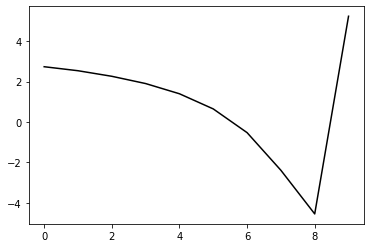

15000 0.36481469800124655
2.803921867380391 0.7120514253530535 -0.12532043476806445 0.06590552429561311
[ 2.69415757  2.57475385  2.35333446  2.03044995  1.54784365  0.80236018
 -0.39730662 -2.35869525 -4.80512804  5.17548251]


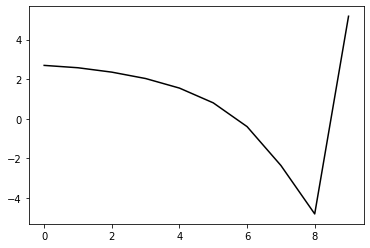

16000 0.4001432125312685
2.6914863427686884 0.8202934159860591 -0.12743084908171248 0.06458018417737924
[ 2.64555058  2.52600398  2.34658871  2.04195745  1.56109898  0.80574106
 -0.42198736 -2.47898772 -5.30180765  5.0627851 ]


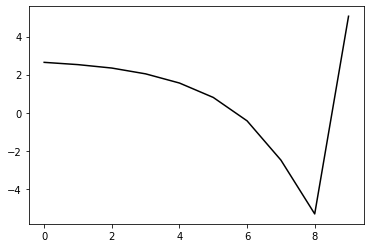

17000 0.4041961898956083
2.626039136718753 0.9049223366292953 -0.13643940528138676 0.06911802963103902
[ 2.68763873  2.53826545  2.34890204  2.07515074  1.65664113  0.98003106
 -0.1719966  -2.20662254 -5.28439988  5.02939818]


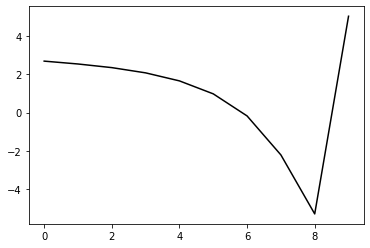

18000 0.4662386473040971
2.5210159371788374 0.9725671734994988 -0.14432190646330617 0.061639916318894226
[ 2.69440383  2.45696956  2.29458745  2.01901767  1.57733559  0.86965491
 -0.31670909 -2.41588471 -5.75243133  4.85375943]


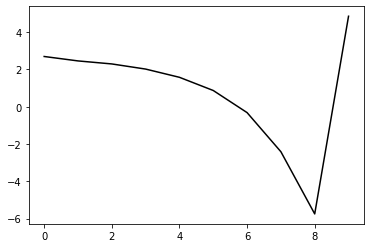

19000 0.26132570379874515
2.3384375489086264 1.1206780557307088 -0.16713518353228984 0.06135704770935673
[ 2.44731645  2.49547061  2.44785327  2.2488157   1.84627812  1.1363335
 -0.10127839 -2.32272902 -5.97106473  4.80657842]


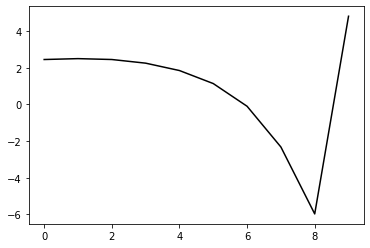

20000 0.2259037271834352
2.0980606941630113 1.1930680686364419 -0.19148303167058942 0.054865344812509854
[ 2.27687656  2.46870127  2.52385978  2.41489582  2.08378383  1.41461606
  0.17022084 -2.1408724  -6.12348274  4.79285652]


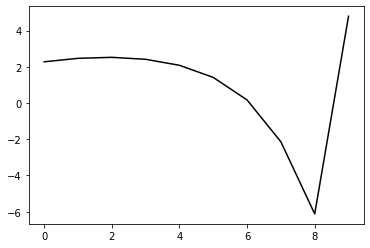

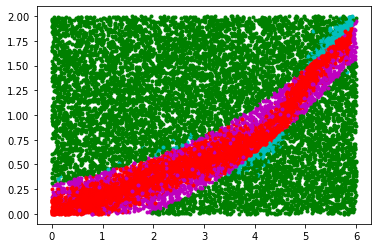

21000 0.35543494447987395
1.9596106180460309 1.2130067672851286 -0.19993107970976792 0.055556200572531245
[ 2.17618359  2.45177646  2.52812752  2.46354459  2.18617048  1.56257542
  0.33780671 -2.00585326 -6.15192216  4.74705029]


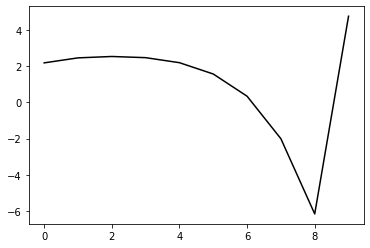

22000 0.21982525808965575
1.8598639216101707 1.2218831622477722 -0.20291202812769926 0.05662225754976965
[ 2.21762843  2.33893751  2.4127911   2.36160273  2.10540465  1.50426674
  0.28696712 -2.09647862 -6.41218749  4.67759285]


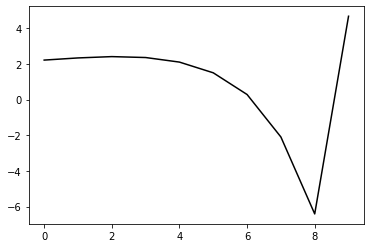

23000 0.1969420983326884
1.806712182537147 1.2241743731040553 -0.2024071809587798 0.05825185198297435
[ 2.20879191  2.28673463  2.34588659  2.30398268  2.0764742   1.51823279
  0.34509948 -2.02493317 -6.4217017   4.67414045]


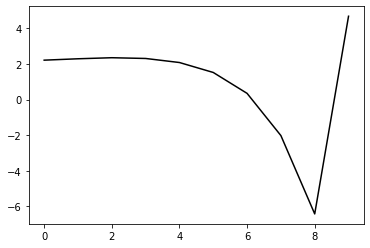

24000 0.281563573810429
1.7474508013017374 1.225281667994912 -0.20065391423369094 0.059839320391917555
[ 2.17785562  2.28971934  2.33143756  2.2820048   2.06294963  1.53055818
  0.39314908 -1.96278206 -6.46036792  4.67302761]


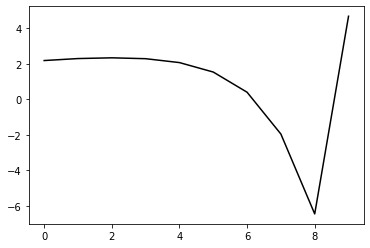

25000 0.21269091198913756
1.6900971441376116 1.234602485252094 -0.20574362046307465 0.060882659388203406
[ 2.18512879  2.27357974  2.31584367  2.2704413   2.06590529  1.56375121
  0.472573   -1.84080729 -6.37393544  4.71264772]


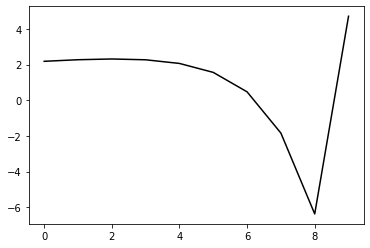

26000 0.3284413355826738
1.6362975642049922 1.235244559376876 -0.2052801486270904 0.060061071885556885
[ 2.15701026  2.27742021  2.30196094  2.24520126  2.03607477  1.53834145
  0.46381477 -1.83376721 -6.43941086  4.66843694]


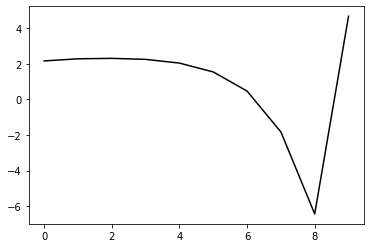

27000 0.24883583245354973
1.5828605080799483 1.2352522111415778 -0.204663309735029 0.06118326175039629
[ 2.19634488  2.23874815  2.25524507  2.18967722  1.97753405  1.48603595
  0.42955989 -1.84538544 -6.5045615   4.62580915]


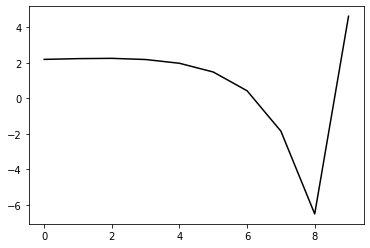

28000 0.286353080616318
1.5398627009985717 1.2349997212319501 -0.20357805091717981 0.06157916820151226
[ 2.1620983   2.24478119  2.26418331  2.20961219  2.00875887  1.53394011
  0.50741526 -1.7248465  -6.40127584  4.68108538]


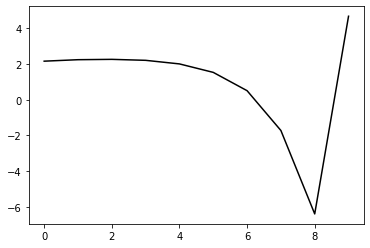

29000 0.2960622964174828
1.4906359201172592 1.2368750524267282 -0.20503635527562572 0.0609829792822181
[ 2.18759181  2.2164421   2.22712933  2.1666944   1.9676452   1.50308279
  0.49773653 -1.70058149 -6.38437364  4.69703816]


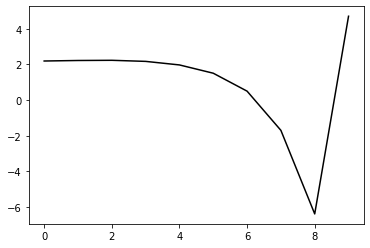

30000 0.2724003149109078
1.450127696532794 1.2340334141474465 -0.20253200546633685 0.06265779684319962
[ 2.14017186  2.25872235  2.26512697  2.20379919  2.00884269  1.55527577
  0.5705639  -1.59800982 -6.29496607  4.73712337]


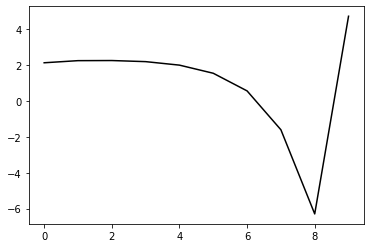

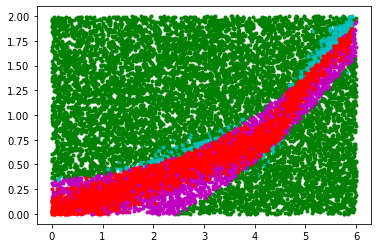

31000 0.2735012378399205
1.3981281079452819 1.2327356581094313 -0.20299846006072694 0.06203492726592762
[ 2.18781488  2.2225897   2.21476017  2.14251176  1.94168884  1.48926092
  0.51583957 -1.62913221 -6.32925834  4.70501971]


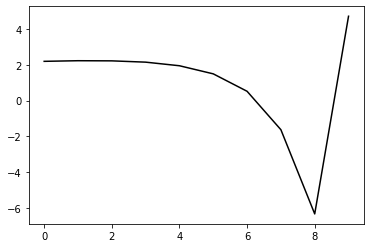

32000 0.25206487878790057
1.3525754842174629 1.2302985021410695 -0.2016503915165583 0.06143373695359553
[ 2.13891699  2.24894554  2.26102451  2.19951841  2.00577521  1.56380243
  0.61082901 -1.49960293 -6.17770281  4.75673176]


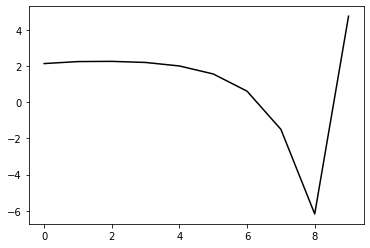

33000 0.22600700902512383
1.305827427505772 1.2282843789075202 -0.20147319779110523 0.06063655450055287
[ 2.16987675  2.2422095   2.23597932  2.16156579  1.96296602  1.52292428
  0.58051355 -1.50461926 -6.1531393   4.74158252]


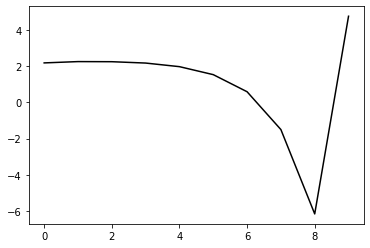

34000 0.19793074377608932
1.2641021567302697 1.2217840934362356 -0.1972570245324018 0.062036103651877644
[ 2.16493453  2.23708102  2.23325406  2.16182616  1.96366792  1.52579885
  0.59345304 -1.46681236 -6.08036577  4.79489508]


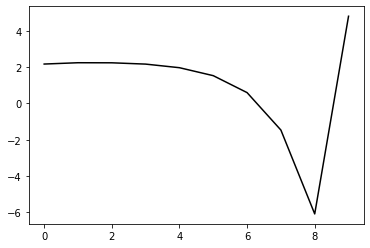

35000 0.3032026001330736
1.2178335550891848 1.2218009424910752 -0.19960593818618308 0.06182436110796983
[ 2.23103038  2.17198455  2.17204154  2.10567823  1.9143029   1.48593023
  0.56811838 -1.46642665 -6.04155901  4.84407076]


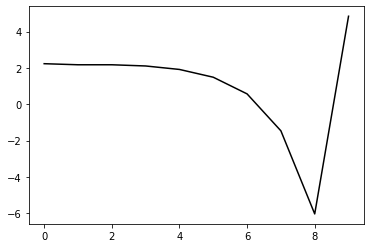

36000 0.2139830183662887
1.1690282289178393 1.2142181360848372 -0.1955489724239561 0.06282402318098153
[ 2.15334987  2.26277087  2.24954497  2.17064646  1.97128437  1.53808459
  0.61878713 -1.41065183 -5.97541254  4.81451951]


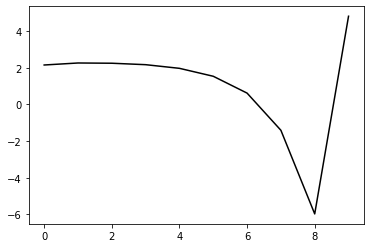

37000 0.2696688668988829
1.12117716156857 1.2125251461373983 -0.19679565843883753 0.0602414499110135
[ 2.17073583  2.2290403   2.2324623   2.16858364  1.98117643  1.56062853
  0.65991184 -1.33755348 -5.84197426  4.83919612]


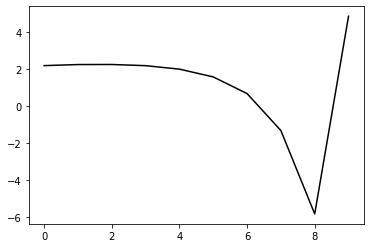

38000 0.21919297139128924
1.0777297784139808 1.2053108332877196 -0.1936107050258195 0.062186200162879283
[ 2.21244747  2.22216569  2.19906164  2.12581487  1.93872046  1.52396512
  0.63401896 -1.34306732 -5.80698991  4.85945741]


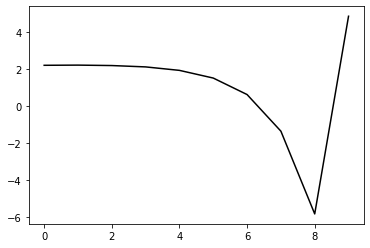

39000 0.23915397704931607
1.0386045633779672 1.1983512643021599 -0.19078452538949328 0.06300141914087837
[ 2.20651824  2.25976451  2.22261555  2.13466415  1.93917873  1.52928984
  0.66213482 -1.26637919 -5.62471766  4.94897277]


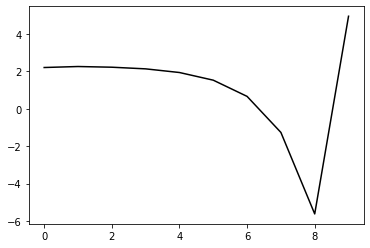

40000 0.2614651768553448
0.9958803025662586 1.1912854151611458 -0.1888448448448987 0.06280689391784944
[ 2.24498147  2.26236235  2.21543473  2.11461817  1.90937817  1.49622834
  0.6379136  -1.25877087 -5.53294858  4.98144574]


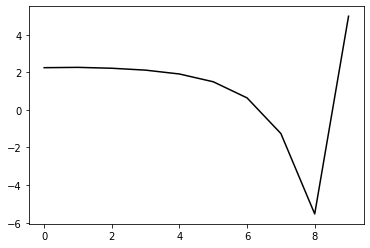

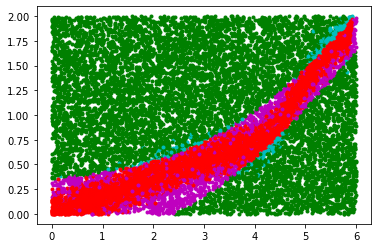

41000 0.26562475345209496
0.9384506996037356 1.1832932331081882 -0.1871874177488941 0.061952579847991636
[ 2.26276633  2.23046911  2.19147638  2.08720324  1.86877373  1.43761318
  0.56524426 -1.32907215 -5.56178859  4.98079781]


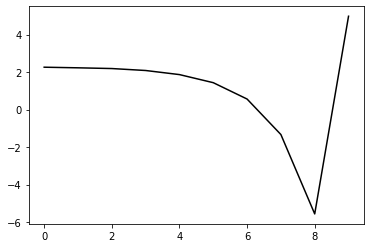

42000 0.18692846214132966
0.8859885819768851 1.177758917009241 -0.18785461462861458 0.06167153259366048
[ 2.2459332   2.26104211  2.21050477  2.10598279  1.89041731  1.46077667
  0.58988491 -1.2900176  -5.46227042  4.99192217]


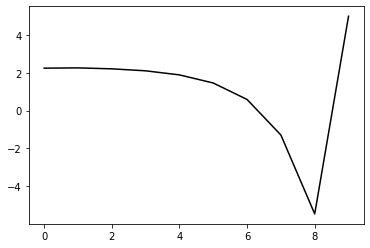

43000 0.3394252452978855
0.8384132302961537 1.169683740332621 -0.1858581234953602 0.059729424935255404
[ 2.31979528  2.1908039   2.13620649  2.03370577  1.81844048  1.38859871
  0.52047971 -1.34322038 -5.4421587   4.94156829]


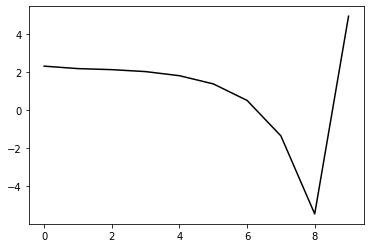

44000 0.37348024888745207
0.7839215799232754 1.1641174117233546 -0.1878045557103323 0.059904769145200876
[ 2.33042052  2.22755877  2.16875306  2.05477245  1.83603249  1.41337841
  0.56053444 -1.27579983 -5.30031072  5.01776058]


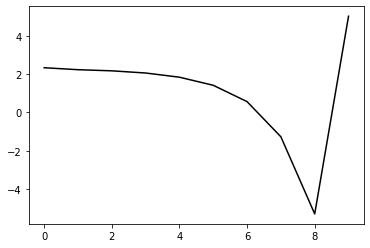

45000 0.17556647534097117
0.7327833434128296 1.1527446626582916 -0.1849037618159403 0.06388496610553134
[ 2.31365081  2.29906784  2.2278361   2.10278317  1.87903809  1.45812285
  0.61771001 -1.18791685 -5.1272622   5.0786289 ]


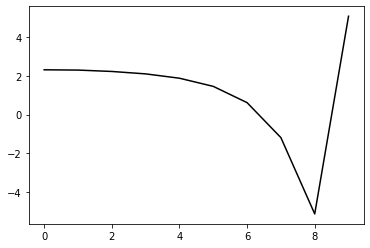

46000 0.21884213652822954
0.6800239559773686 1.1441331535108816 -0.1838387801707257 0.060676636826167536
[ 2.28153418  2.2982067   2.25228835  2.14371828  1.92683176  1.50754234
  0.67411395 -1.10170365 -4.93974223  5.13711297]


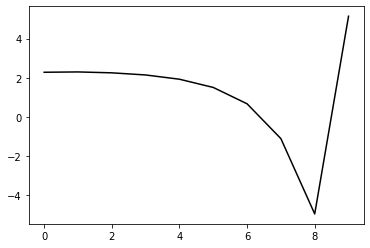

47000 0.17591674700900142
0.6200739548263877 1.1332877902554612 -0.18306509381230243 0.06192265699124502
[ 2.30418761  2.29467092  2.22978863  2.11147168  1.89325541  1.47568975
  0.64443584 -1.118737   -4.89648979  5.21372098]


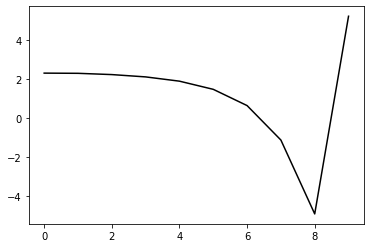

48000 0.1724945585590202
0.5543843254954646 1.1217435758007919 -0.1814337575530349 0.06184330787543687
[ 2.33177648  2.27874465  2.20770028  2.08138661  1.85176122  1.42136141
  0.57761801 -1.19122493 -4.92716689  5.17697446]


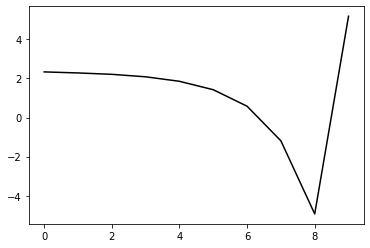

49000 0.31303596573348036
0.5179887746388386 1.1106173993359416 -0.17749201910746212 0.06376850573920026
[ 2.30589577  2.36486473  2.276473    2.1442853   1.9205772   1.51134833
  0.70910973 -0.98374559 -4.54474542  5.31213073]


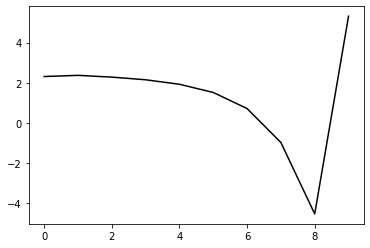

50000 0.3421418855902478
0.47171099934201277 1.1022163112424326 -0.17944305641306282 0.05934102391862359
[ 2.4907677   2.28913415  2.1469868   1.97415293  1.72003196  1.28707204
  0.47128036 -1.21456272 -4.71458295  5.20078694]


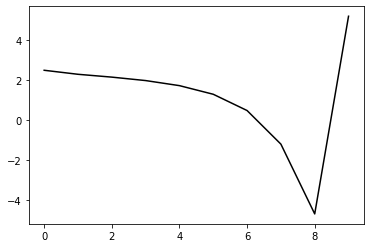

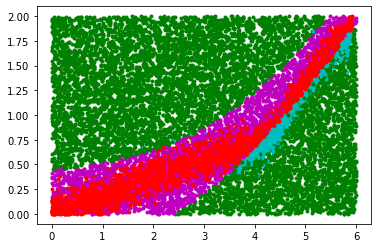

51000 0.23160882309533334
0.4041501036853541 1.0852051527156419 -0.17472429862124042 0.06667035460417922
[ 2.40676967  2.38975465  2.27128204  2.09156497  1.81101766  1.34959288
  0.51558608 -1.16705374 -4.60953788  5.26174494]


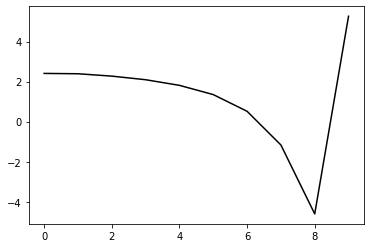

52000 0.27558019610206513
0.3559620129145487 1.075529216004873 -0.17579904340996114 0.06385042600855788
[ 2.47098189  2.38745777  2.23260976  2.04392173  1.76243824  1.29505657
  0.45431303 -1.20534917 -4.52436183  5.3012174 ]


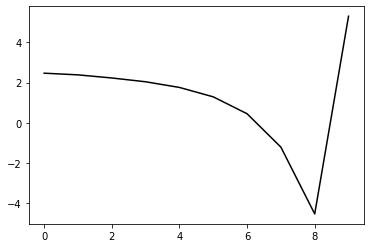

53000 0.26254192815653055
0.28707263881152634 1.064062630100445 -0.17591472238979516 0.06272061841202388
[ 2.46119001  2.37412432  2.25090759  2.07975061  1.81033067  1.3547756
  0.5301958  -1.09179202 -4.27008687  5.35623717]


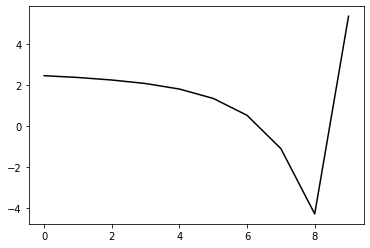

54000 0.2971045233546155
0.22606856943335002 1.0506825638842776 -0.17464519958635835 0.0646183611192039
[ 2.483547    2.4243258   2.26578207  2.06748549  1.78355582  1.32521952
  0.50966249 -1.07991589 -4.13657748  5.38782005]


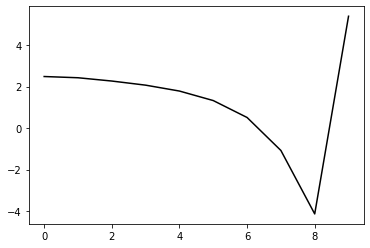

55000 0.32140086093033826
0.17173461717342417 1.0422349478221213 -0.177606700977389 0.05949239606760058
[ 2.53640488  2.38825876  2.23949993  2.03915326  1.73987815  1.25959237
  0.42724354 -1.15554427 -4.11958136  5.36406031]


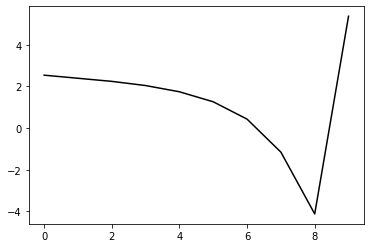

56000 0.27482076434740155
0.13811098608138644 1.028997276966465 -0.17651885678191628 0.06155506604553405
[ 2.60263754  2.35137096  2.18135963  1.96002515  1.63970452  1.14205699
  0.29754107 -1.27736633 -4.1543588   5.38358851]


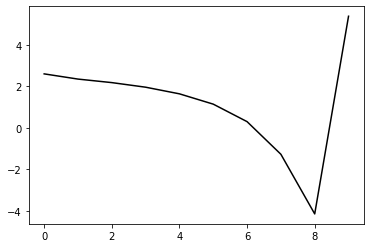

57000 0.2402207097658178
0.1205636092939772 1.0183641216675419 -0.17606356715982305 0.06685189335850421
[ 2.49135184  2.44059742  2.27043334  2.04533224  1.72434993  1.22618183
  0.38578084 -1.16393937 -3.94110906  5.46590837]


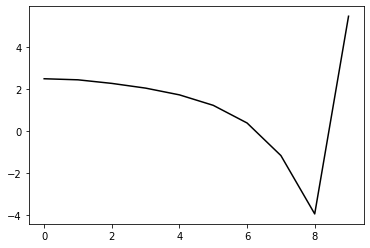

58000 0.28820449142526483
0.086689332824055 1.00888009145662 -0.1783404776259148 0.06350154116317556
[ 2.49347283  2.3229511   2.15734691  1.93239106  1.60970403  1.10991701
  0.27237578 -1.25267406 -3.91681164  5.4765583 ]


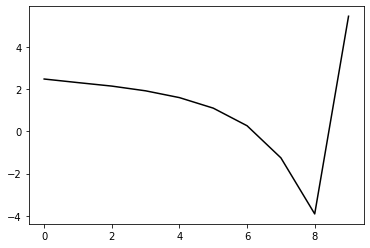

59000 0.2559240297769927
0.06697193826164462 1.001371730904965 -0.18071550436310127 0.0664825874874003
[ 2.46688458  2.27719918  2.10436909  1.88123071  1.55684858  1.05020988
  0.20268481 -1.32091908 -3.91194624  5.48993191]


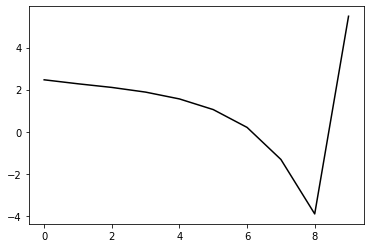

60000 0.25562613043734195
0.05688525266459237 0.9873337722485978 -0.1771188810695903 0.07003680431529197
[ 2.34981895  2.18013006  2.02886481  1.82770753  1.51955108  1.02049997
  0.17273542 -1.34907899 -3.88421353  5.52548371]


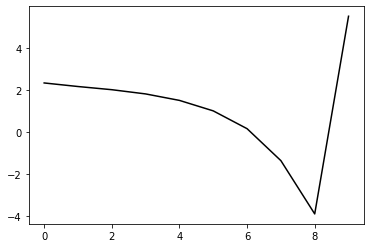

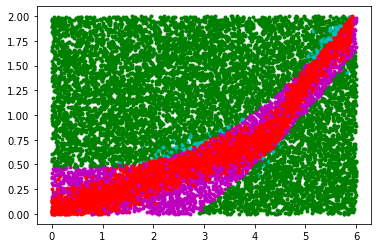

61000 0.3160719860670802
0.0539426029355064 0.9745639126998621 -0.17430565402708803 0.0737521370735284
[ 2.2229595   2.16228876  2.02216125  1.82184929  1.52179895  1.04216195
  0.21934539 -1.27768863 -3.75216706  5.55795641]


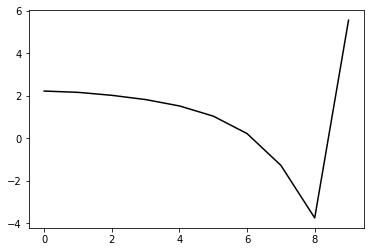

62000 0.2186996976797433
0.04021849174909836 0.9750938217777588 -0.1815336940208092 0.06605905679196492
[ 2.19116042  2.06346094  1.91683436  1.72447401  1.43194443  0.96312671
  0.16469891 -1.28135304 -3.64058977  5.55453974]


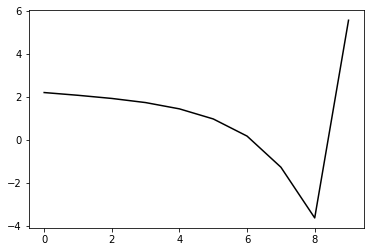

63000 0.256728141239041
0.035018620665407015 0.9595829575474527 -0.17986796079549966 0.06873291895601201
[ 2.05080145  2.0021558   1.87427994  1.69867128  1.42742002  0.97772977
  0.19376886 -1.2368796  -3.55990904  5.59970163]


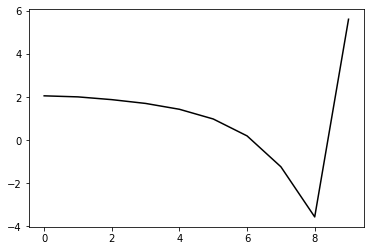

64000 0.24806087972683488
0.03396362631364806 0.9527275353175866 -0.18219698817215343 0.06932648045037154
[ 2.05841503  1.91909029  1.78524033  1.61291206  1.35199351  0.92703678
  0.18485752 -1.18548    -3.40419559  5.65877604]


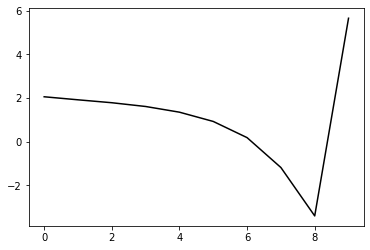

65000 0.2457944630449666
0.03217536899283222 0.9478765045473291 -0.1862390914711886 0.0719479312777626
[ 1.99695312  1.85252997  1.70193969  1.50907779  1.23202039  0.80224283
  0.07355356 -1.25427758 -3.38800612  5.66716241]


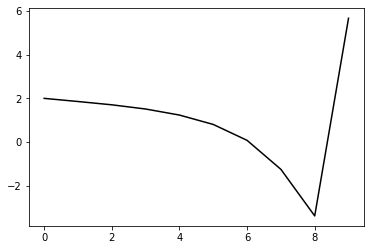

66000 0.24392756219344236
0.03323613536635896 0.9359484364021856 -0.18249789449713155 0.0782508216706655
[ 1.94969725  1.880777    1.73723348  1.54643118  1.27498051  0.85465435
  0.14243781 -1.14296707 -3.18388619  5.72084954]


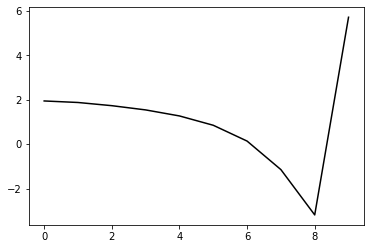

67000 0.2153341960845505
0.027138656081183758 0.9257376536880386 -0.18479338773920445 0.0750822504200277
[ 1.89787256  1.7161145   1.55790237  1.36616082  1.09584045  0.67191859
 -0.04224004 -1.31522072 -3.30493455  5.69009888]


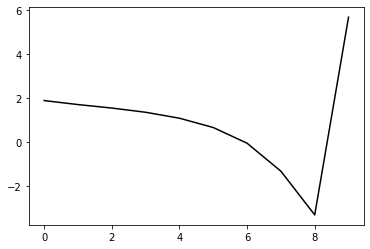

68000 0.3221988453645484
0.020031102895221187 0.9202150768073748 -0.18782462585810691 0.07276932850991892
[ 1.76318339  1.71288592  1.58971081  1.42155534  1.16369935  0.74999384
  0.05071019 -1.19159132 -3.10116132  5.72002346]


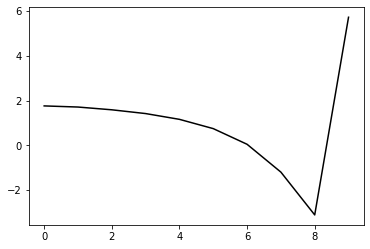

69000 0.28344091726953236
0.024603011793172612 0.9103577462838146 -0.1886427194172489 0.07808964306724397
[ 1.80264152  1.64793829  1.4908275   1.29367663  1.01950485  0.59864744
 -0.10107708 -1.32924629 -3.16812077  5.72280393]


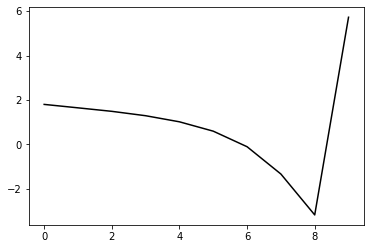

70000 0.23604906387622152
0.019408888411567987 0.9031600605330302 -0.19084493615796128 0.07723126920676723
[ 1.7629923   1.67195931  1.54595932  1.36297554  1.08874211  0.66317183
 -0.03529506 -1.24471661 -3.01924041  5.77539038]


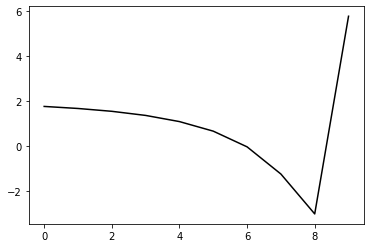

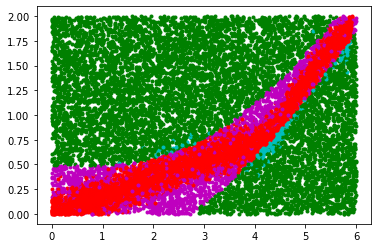

71000 0.22949028630316112
0.019712414622540884 0.8932476038934545 -0.1914199973361786 0.0758420178928856
[ 1.67307321  1.62287482  1.48504012  1.30557481  1.03760615  0.61661358
 -0.07969918 -1.27882713 -3.00238331  5.75432033]


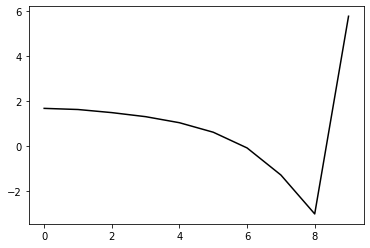

72000 0.22024999912591758
0.021757857047181785 0.882900209612094 -0.19051446041033027 0.0807609285920066
[ 1.71082265  1.66295918  1.52346321  1.33731486  1.06608747  0.64845044
 -0.04058102 -1.23134043 -2.93128701  5.80339116]


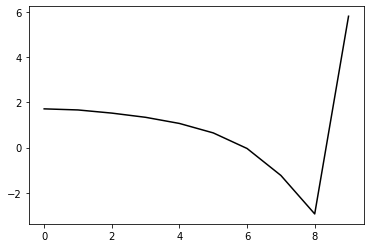

73000 0.1966019460085225
0.02006113417824082 0.8751093942822887 -0.19200914269818975 0.07799604824732329
[ 1.65489179  1.59840257  1.45392342  1.27433637  1.01665259  0.60826386
 -0.07551436 -1.25560573 -2.92052663  5.79062165]


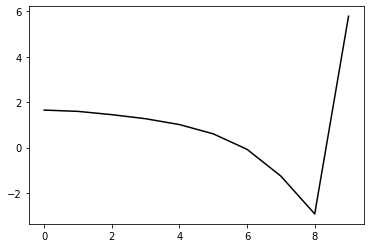

74000 0.24474488510435466
0.018837314372074372 0.8682213001987382 -0.19241781878637929 0.07979041883354489
[ 1.67246042  1.53288868  1.40657747  1.21700282  0.94385957  0.53324823
 -0.13350303 -1.27580951 -2.86261921  5.83125671]


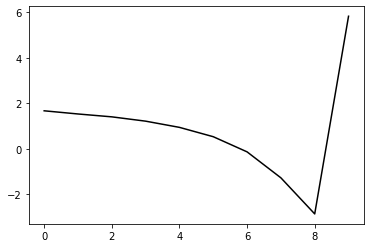

75000 0.213962923447945
0.018925189479536045 0.8606805623032506 -0.19385653530314 0.08409245064442088
[ 1.51874359  1.53235817  1.40279365  1.20400801  0.92074782  0.50205023
 -0.17096845 -1.3123451  -2.8789431   5.81594592]


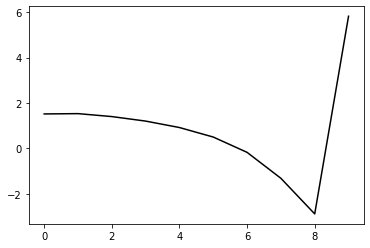

76000 0.34353193296361234
0.026149138523706723 0.8420767453889455 -0.18876357227718832 0.08583361858803028
[ 1.59182925  1.59617912  1.44874861  1.26057535  0.98915231  0.56780709
 -0.12172015 -1.28518479 -2.87237249  5.81402075]


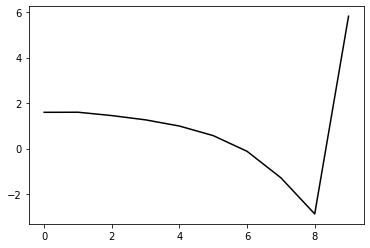

77000 0.2248999647420593
0.012896517793591036 0.8392537949497505 -0.19455142662731478 0.0788183329256081
[ 1.55551682  1.49951034  1.37104097  1.19655664  0.9356649   0.53249132
 -0.12763737 -1.24891709 -2.75593544  5.82710037]


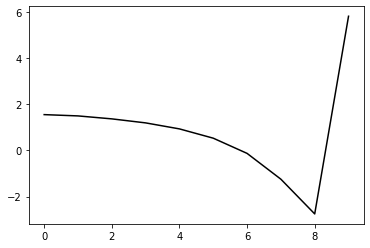

78000 0.22994692858234902
0.0190667203228951 0.8284635415928371 -0.19358760667111585 0.08207966919687766
[ 1.56937248  1.56387927  1.42416521  1.24094569  0.98138119  0.58502587
 -0.06655309 -1.17587265 -2.65406835  5.88538277]


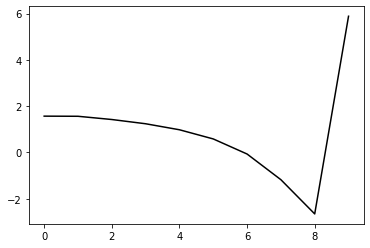

79000 0.20864010770246838
0.01932434264149494 0.8191176381414668 -0.1951844087465473 0.08202495249036705
[ 1.64526484  1.50598817  1.35173317  1.16216583  0.89784587  0.49813347
 -0.15517587 -1.26615554 -2.74455454  5.87071308]


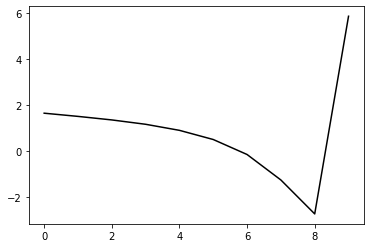

80000 0.2545470329028408
0.02186328466024238 0.808540939613709 -0.19505706064179174 0.08216060729037362
[ 1.53697843  1.55848315  1.42848625  1.24861599  0.9879554   0.59020199
 -0.05615313 -1.15040696 -2.60490566  5.91141446]


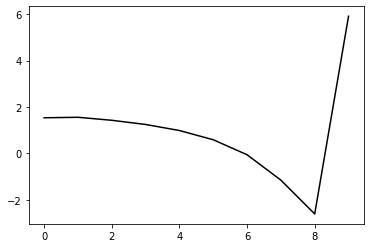

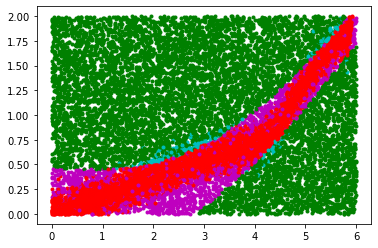

81000 0.5243389571992237
0.027667852362526557 0.7874249655798505 -0.18517586034881878 0.08946532476666695
[ 1.80574037  1.6026886   1.46838141  1.29189241  1.04305297  0.65815996
  0.01985934 -1.06551744 -2.50553917  5.95888302]


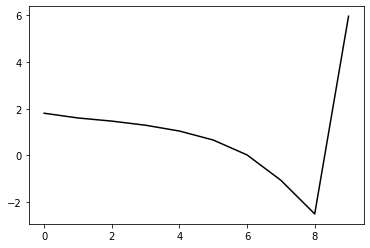

82000 0.31722203241750524
0.02319622025338965 0.7820770136317717 -0.19015003890212967 0.08484666936518764
[ 1.64208942  1.58488098  1.44324219  1.25406269  0.98525671  0.58368567
 -0.06091609 -1.14566757 -2.57613753  5.91890127]


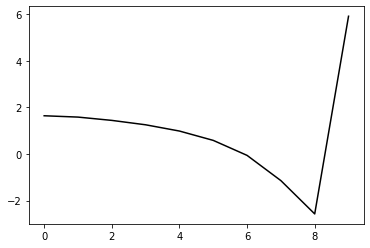

83000 0.15990648368102023
0.01817638885888532 0.7776465910481847 -0.1947119716840113 0.08118131893969915
[ 1.53764809  1.54291541  1.41579553  1.22843279  0.96116461  0.56201222
 -0.07257269 -1.12856073 -2.50117798  5.94996749]


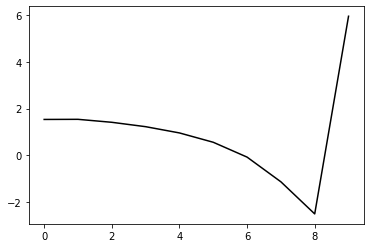

84000 0.19714951840857978
0.014855856359870327 0.7717316151213732 -0.1966191156464415 0.08163775794037
[ 1.53759644  1.49224507  1.35911303  1.16855902  0.89653026  0.49268059
 -0.14858739 -1.20417705 -2.54111371  5.9281362 ]


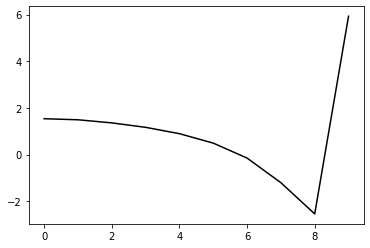

85000 0.29317710063980346
0.013447542550763244 0.7653663094769637 -0.1984507867125609 0.07632128064746337
[ 1.52694132  1.46157149  1.32775524  1.15906466  0.91505343  0.53595883
 -0.08843114 -1.1308502  -2.44155366  5.92875038]


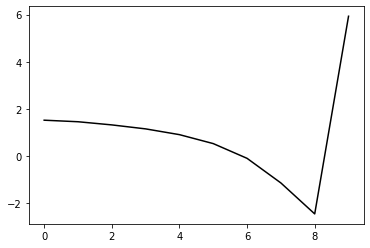

86000 0.3181696626039389
0.01962321624938003 0.7545563020944842 -0.1959255063150404 0.08373114171352171
[ 1.66720726  1.47391689  1.32558306  1.1309991   0.86758173  0.48132793
 -0.13656993 -1.16486773 -2.4498594   5.9734174 ]


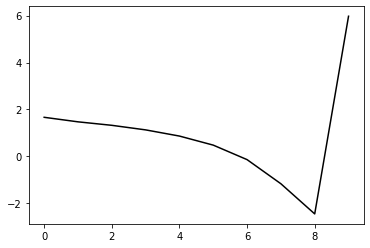

87000 0.2111989625495256
0.013724660281109644 0.7493536083124533 -0.19747147582036145 0.08179037838250473
[ 1.52289355  1.50578652  1.37711047  1.19212651  0.92513179  0.5286095
 -0.09396678 -1.10891391 -2.3567645   5.97673393]


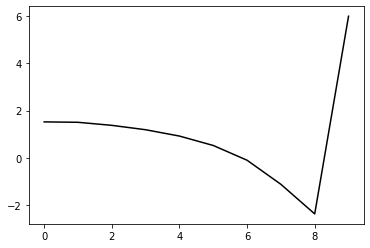

88000 0.30058825734899974
0.02208327001165454 0.7340356711999279 -0.19269094433246792 0.08365084779716629
[ 1.62130848  1.50033896  1.36646899  1.17951501  0.91610505  0.51987309
 -0.11247974 -1.14037199 -2.38262278  5.98954731]


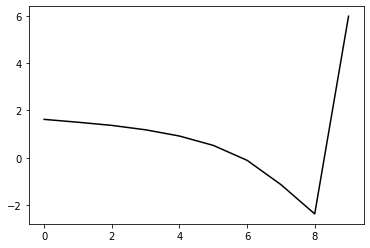

89000 0.2174828113527661
0.020313531474260873 0.7313998931171649 -0.19904354730802437 0.08039713558943368
[ 1.60866764  1.53207263  1.38579318  1.1992902   0.93593172  0.54330808
 -0.07863556 -1.09207525 -2.31163178  5.9983962 ]


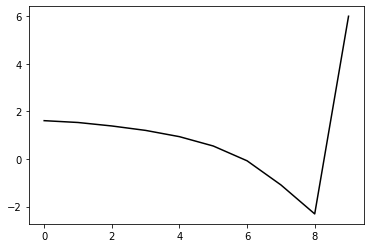

90000 0.23223931353450292
0.01580658684776066 0.7255453440747088 -0.20151610678673348 0.08286440080068919
[ 1.5875785   1.50639872  1.36354724  1.16067868  0.87242669  0.45410376
 -0.18768959 -1.2106687  -2.42082453  5.96041043]


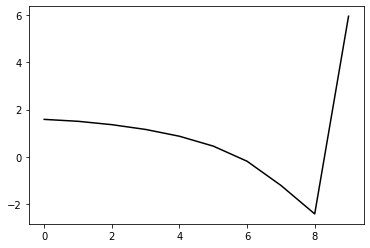

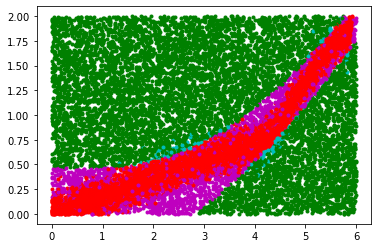

91000 0.21152355101743864
0.01773896477596144 0.7167944202232902 -0.19971672201982632 0.08367496420838882
[ 1.5866716   1.43309612  1.31331414  1.13142914  0.859452    0.44752201
 -0.19790822 -1.2264329  -2.42977079  5.98330763]


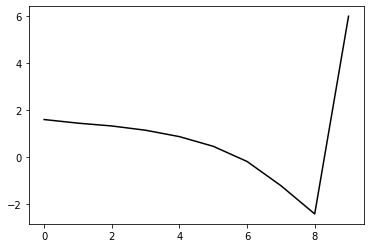

92000 0.2694164031303809
0.019672298928143643 0.7080765284571049 -0.19875734708519363 0.08454027671718109
[ 1.50905451  1.52375439  1.39500264  1.21978918  0.97018636  0.58470268
 -0.04237048 -1.05982248 -2.23926275  6.03561404]


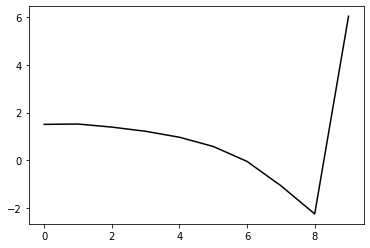

93000 0.2707530716968281
0.011290733174966127 0.7050778280374193 -0.2021158037448916 0.08207243642031063
[ 1.53207148  1.43563254  1.2942432   1.11154335  0.84875328  0.4514777
 -0.1755521  -1.18364949 -2.34054134  5.99910028]


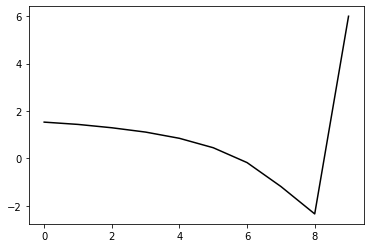

94000 0.2796940175427183
0.012546948734877456 0.7011532727112567 -0.20492533569270371 0.08179556165130525
[ 1.51691642  1.47760308  1.33760902  1.15098207  0.88623398  0.48833827
 -0.14658407 -1.16808727 -2.33096648  5.9708522 ]


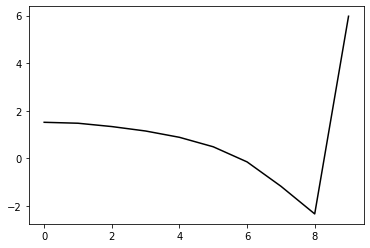

95000 0.25617072379076405
0.0157549524146337 0.6893916263896958 -0.20139097007461168 0.0853689327849334
[ 1.58949513  1.48206279  1.32433665  1.1246664   0.84107009  0.41803887
 -0.24306654 -1.2932896  -2.4820009   5.96872785]


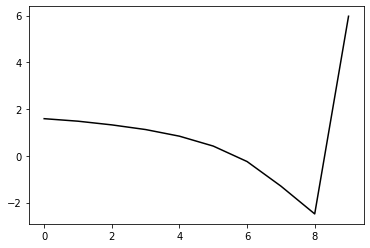

96000 0.30356791535203764
0.013750376279511502 0.6858941061270023 -0.20668941877489186 0.0810511488744498
[ 1.5136166   1.46938668  1.3194741   1.11511205  0.83091763  0.413878
 -0.24077975 -1.28753278 -2.4755253   5.92031694]


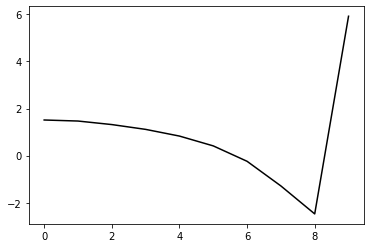

97000 0.20330861554059165
0.012421130520999855 0.6807980974203586 -0.20728527791564608 0.08502942954684384
[ 1.48551981  1.47633142  1.34082194  1.14117708  0.8558073   0.43705574
 -0.2121622  -1.24357369 -2.41223184  5.94443682]


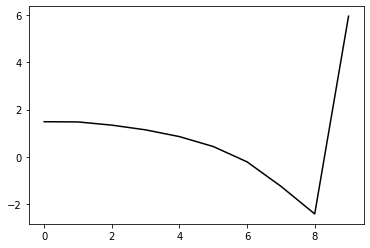

98000 0.24853427841602613
0.014239405042710613 0.6734546554393454 -0.20763205755435354 0.0823439330132408
[ 1.58430048  1.46083304  1.31298209  1.11538128  0.83602322  0.41604812
 -0.24956125 -1.30567698 -2.49276817  5.92210043]


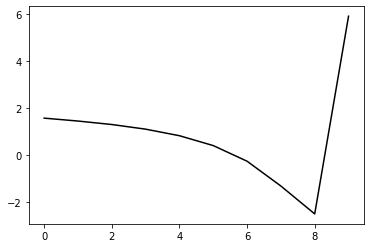

99000 0.27133269763080986
0.021298646551727283 0.6599697341924984 -0.20287662376407808 0.08792494598489636
[ 1.66755898  1.53875873  1.39809003  1.2123817   0.94925752  0.54708814
 -0.10411313 -1.15945374 -2.36632028  6.01877659]


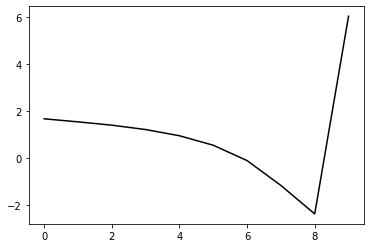

In [17]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if np.isnan(loss)==True: break
    for i in range (90):
        optimizer.apply_gradients(zip(gradients, [h]))
        if any(np.isnan(h.numpy()))==True: break
    for i in range (10):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
        if any(np.isnan(h.numpy()))==True: break
    if j%100==0: 
        print(j*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'c.')
            plt.plot(x_data1[i], y_data1[i], 'r.')
            plt.plot(x_data3[i], y_data3[i], 'm.')
        plt.show()

0 0.41894991650105656
0.02127458551524249 0.6485981917302672 -0.19955950782537987 0.09063062840950789
[ 1.50500578  1.47703196  1.32719841  1.13160296  0.85336635  0.44048869
 -0.20599968 -1.2447467  -2.43087091  5.9403659 ]


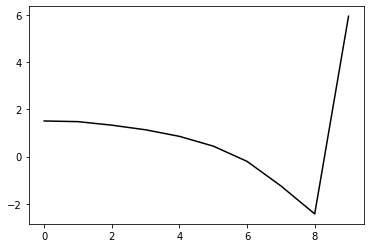

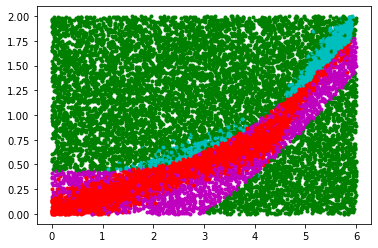

1000 0.324465738537982
0.011982026607639166 0.6441133620740401 -0.21624322381028047 0.08332290584171784
[ 1.62716473  1.49818019  1.33670051  1.11779165  0.81022371  0.37126639
 -0.29806525 -1.36348888 -2.60150509  5.91343505]


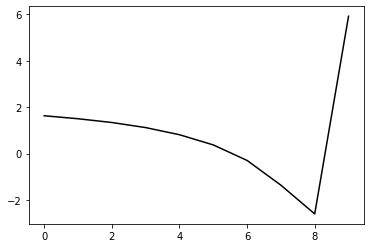

2000 0.1849730686096648
0.02049993450637412 0.6284509544148251 -0.21010021912353427 0.08876284381414111
[ 1.55763763  1.51907873  1.36992073  1.1689217   0.88871446  0.46622766
 -0.20324657 -1.27002674 -2.50858676  5.98681704]


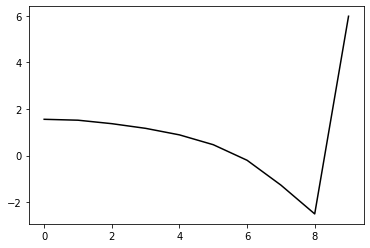

3000 0.20115358839863615
0.01745466765956695 0.6205728036386695 -0.21172289911322204 0.08637243832101042
[ 1.61039471  1.47931436  1.31573658  1.11509973  0.83690269  0.41532381
 -0.25559851 -1.33382507 -2.58321824  5.93034197]


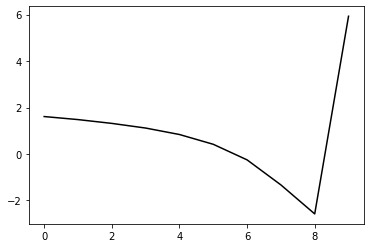

4000 0.2723010343040173
0.016206713670397124 0.6146047922621727 -0.2116768712305035 0.08889513173496723
[ 1.6033339   1.49098745  1.31821025  1.10315201  0.81011533  0.38151051
 -0.29059365 -1.36598071 -2.60629581  5.91916401]


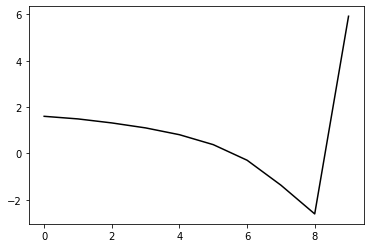

5000 0.19433546465012339
0.015790334123885048 0.6110958078455737 -0.2149195254514677 0.08977733138432134
[ 1.5022215   1.51356764  1.3711943   1.15951876  0.86089988  0.42891294
 -0.23762681 -1.29905227 -2.51994146  5.91177013]


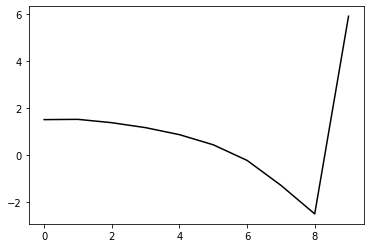

6000 0.30312769425071273
0.014660045607692325 0.6068448844136491 -0.21721819464222278 0.08952648549633434
[ 1.53758038  1.47048186  1.3186256   1.11007824  0.81596509  0.38522603
 -0.28269921 -1.34216625 -2.54507752  5.90072435]


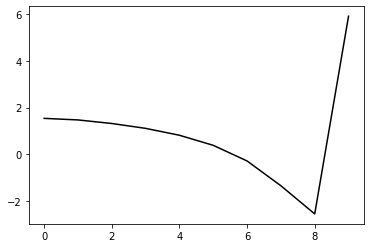

7000 0.2637920919535832
0.014319858370767597 0.6020119191115598 -0.22082112533063306 0.08846239450248755
[ 1.58528898  1.41525963  1.229515    1.02740935  0.74342068  0.31184375
 -0.36905386 -1.44983441 -2.6698404   5.89057849]


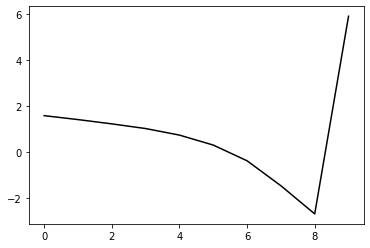

8000 0.2667483073860857
0.018699454705576348 0.5900647011365523 -0.2164225406229604 0.09244876215679347
[ 1.5963073   1.49388353  1.33857601  1.14244883  0.8620705   0.43908743
 -0.23335777 -1.31473231 -2.55722003  5.92273131]


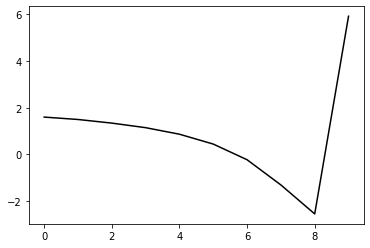

9000 0.295551467886069
0.020480178100875567 0.5802307855642491 -0.21404486946506673 0.09304536510351517
[ 1.58353903  1.47927484  1.32140945  1.11706102  0.83025903  0.4088868
 -0.25049145 -1.31002494 -2.53483332  5.92221691]


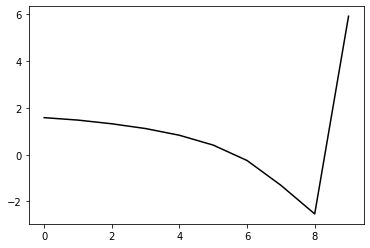

10000 0.2682036072514898
0.014261575588883744 0.579189707586431 -0.22125389623177374 0.08872265943294125
[ 1.51082481  1.41229288  1.24926972  1.04214148  0.76020124  0.34435427
 -0.3082282  -1.35291922 -2.55220586  5.92473078]


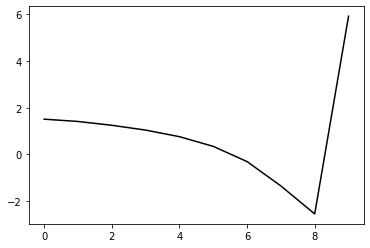

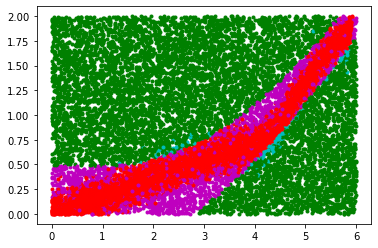

11000 0.2810698942708992
0.010965196474975712 0.5758535146115444 -0.2236930252581583 0.08664167409149623
[ 1.57023372  1.44584885  1.29451155  1.09101049  0.80075433  0.3727829
 -0.29362717 -1.35210051 -2.56233432  5.91929866]


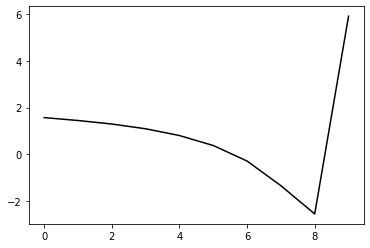

12000 0.25280709170156007
0.018542553996211013 0.5643713171892143 -0.21975151257699863 0.09167303830919528
[ 1.6366015   1.45436835  1.30702301  1.1093954   0.82748465  0.40258558
 -0.26691357 -1.33277301 -2.55438208  5.95039013]


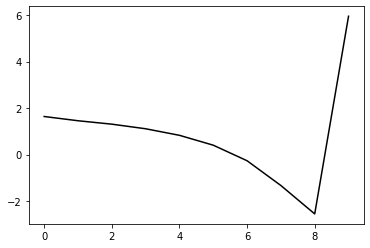

13000 0.27972119163214526
0.007490194717453929 0.5646187076294994 -0.22418598381420124 0.08580577323511872
[ 1.49412962  1.36450063  1.21831336  1.02190922  0.74346937  0.32549419
 -0.33804392 -1.39797307 -2.60078428  5.88468975]


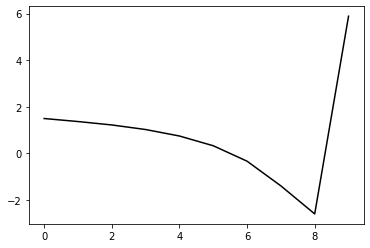

14000 0.2252004434788096
0.0203981967871469 0.5484052598652036 -0.218068544419601 0.09101096165443835
[ 1.5646392   1.49738868  1.33509659  1.13943093  0.86409568  0.44704145
 -0.21902837 -1.2952358  -2.5422114   5.90913265]


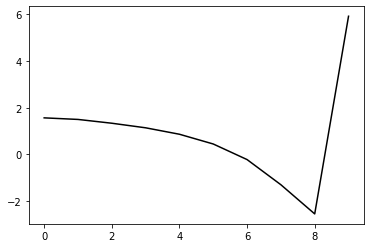

15000 0.27743200088842795
0.01287405415541037 0.5459330334683203 -0.22405718439908703 0.0839374513786033
[ 1.54125718  1.46437516  1.31866151  1.12700735  0.85595727  0.44731572
 -0.20249266 -1.25568327 -2.47989983  5.95814589]


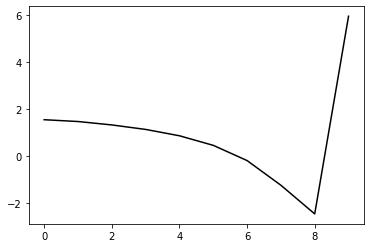

16000 0.17471251872219232
0.014950141546851627 0.5394296699801285 -0.22430202052929965 0.08872717841010018
[ 1.59903758  1.57232     1.43266951  1.23095594  0.94860486  0.53414359
 -0.11680568 -1.17051825 -2.40865712  5.93282805]


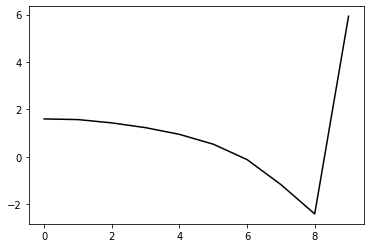

17000 0.2384574570790545
0.014065402029844158 0.533993748649791 -0.22722962968026314 0.08695265867791384
[ 1.56409873  1.4964002   1.33535962  1.12706886  0.8394697   0.41634366
 -0.24518994 -1.30413982 -2.540834    5.94148708]


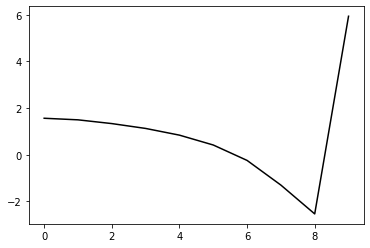

18000 0.1998871566518602
0.014605003736333177 0.528872767906416 -0.22740888181819585 0.08933421370571161
[ 1.54027941  1.51110924  1.35845343  1.13535008  0.83107311  0.39174181
 -0.2888531  -1.36752936 -2.6150853   5.91586797]


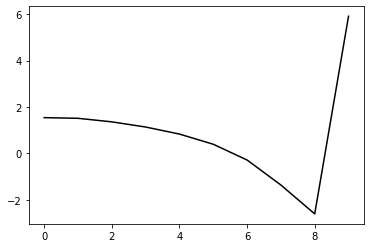

19000 0.15280247300148228
0.016834144397079944 0.522455767097143 -0.22739318837782757 0.08999604523977768
[ 1.6038797   1.52552644  1.36792198  1.17323462  0.89598805  0.4699673
 -0.21278182 -1.30568836 -2.56495131  5.9183884 ]


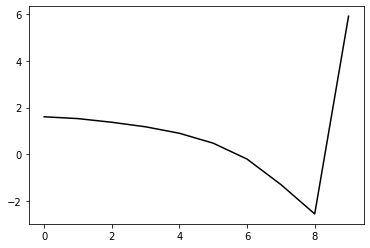

20000 0.30953372894573017
0.022379617406161813 0.5084680873923354 -0.2206316794938855 0.09473270065316458
[ 1.65268094  1.49891761  1.32471508  1.11283726  0.8190272   0.38148183
 -0.30945286 -1.41667496 -2.69960176  5.89236078]


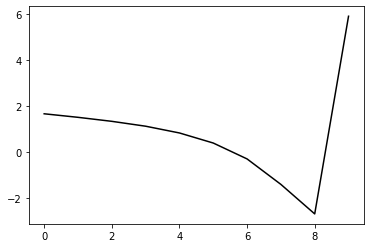

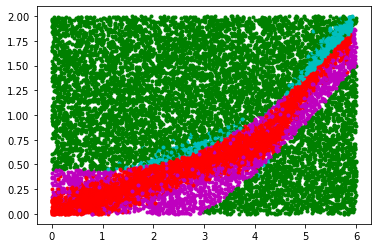

21000 0.30025148397254803
0.01953256178877582 0.5083240345170752 -0.22620815481868384 0.09465772240375907
[ 1.58379566  1.52201853  1.36548047  1.14903812  0.84791506  0.40653782
 -0.2784987  -1.37071028 -2.636297    5.90190676]


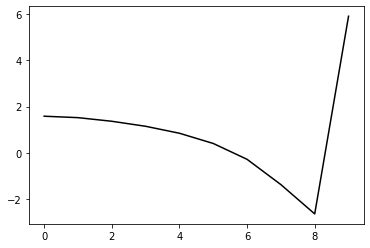

22000 0.15944421294296995
0.011490304177938143 0.509070348819739 -0.2322132027202501 0.0901927683442431
[ 1.51373293  1.42109146  1.26317702  1.04624482  0.74889957  0.31643592
 -0.35766888 -1.43108012 -2.66329879  5.88505742]


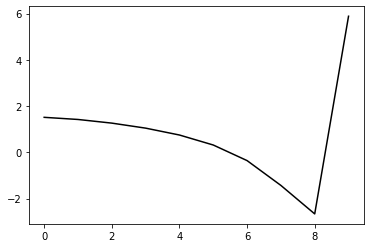

23000 0.19654010076229056
0.014478749959136786 0.5031157773463567 -0.23179647445601606 0.09153074652804155
[ 1.58977696  1.47413304  1.31807927  1.11158855  0.81647037  0.37701476
 -0.30952025 -1.39533237 -2.63425162  5.89601033]


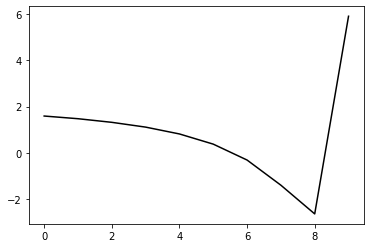

24000 0.2679685168030962
0.01724178067327495 0.4964429398749882 -0.23227531444006108 0.09148625457645652
[ 1.59125276  1.51301123  1.34653607  1.13450001  0.83939044  0.40265063
 -0.28271339 -1.37461685 -2.63076112  5.90151528]


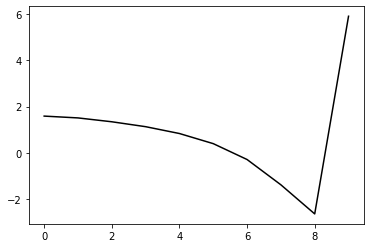

25000 0.24853989156192743
0.016766443683746825 0.4909116918541965 -0.23144540002508307 0.0945084994582705
[ 1.57609401  1.51419842  1.3452551   1.12589219  0.82382754  0.38226438
 -0.30066854 -1.38013678 -2.61059266  5.91564849]


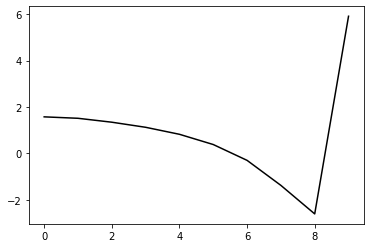

26000 0.33956459625489455
0.016557307460768177 0.48616827034079757 -0.2326736968662128 0.0951095241973503
[ 1.5412748   1.50513339  1.339983    1.11553725  0.80827815  0.36349324
 -0.32054104 -1.39889006 -2.62646719  5.90021688]


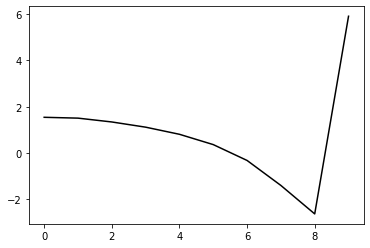

27000 0.20808599588644655
0.010923848770833237 0.48410022224643245 -0.23456971413909652 0.09349438289773092
[ 1.59076395  1.50829268  1.37665279  1.18962795  0.91695674  0.49787486
 -0.16883069 -1.22586159 -2.41255936  5.9339945 ]


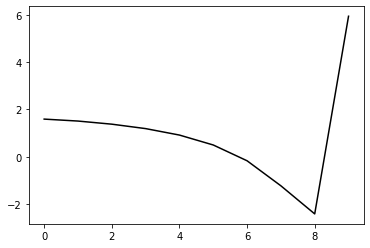

28000 0.3517533384925941
0.020998629461670294 0.47248458904399215 -0.2311277070292483 0.09699497318307113
[ 1.56208475  1.52260548  1.35556941  1.13323071  0.83101149  0.39206898
 -0.29156318 -1.37674918 -2.60466284  5.89320151]


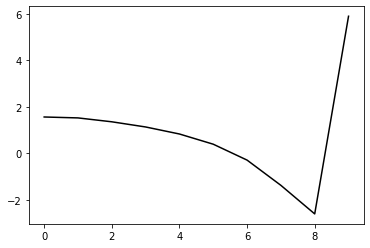

29000 0.2460300777677044
0.012188885794865698 0.4713676386214279 -0.23499671682385348 0.09466057879780526
[ 1.52528094  1.48589497  1.33503654  1.11944385  0.81303353  0.36757618
 -0.31419252 -1.38180437 -2.57331278  5.9098842 ]


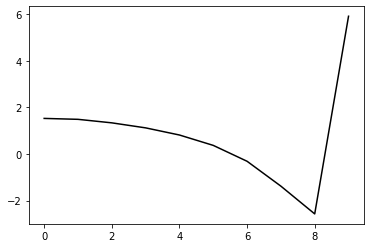

30000 0.23006499818615062
0.009237586012455177 0.46742383470672216 -0.23442350711908158 0.09414048664245578
[ 1.47974418  1.43257867  1.29824371  1.10285428  0.81702343  0.38557747
 -0.2925107  -1.36161585 -2.54692195  5.92244014]


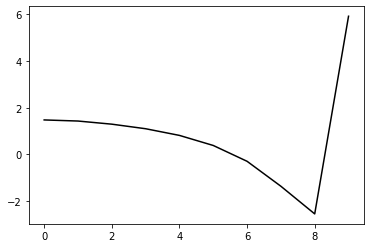

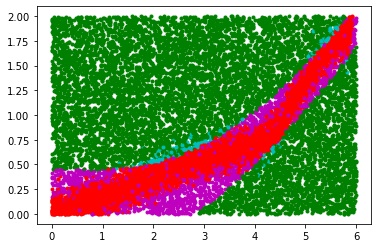

31000 0.3150661936402284
0.00787344910204666 0.468932451503963 -0.24113138850366508 0.09102926376211538
[ 1.47789157  1.33928113  1.17765778  0.96643937  0.67285392  0.24375625
 -0.42551826 -1.4917754  -2.68081486  5.86398617]


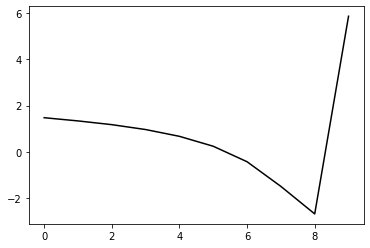

32000 0.23010268091726246
0.010306393830027996 0.46344801226041143 -0.23989095246381512 0.0933265344031608
[ 1.5108751   1.39555891  1.23553417  1.0249513   0.72724102  0.28696884
 -0.39552627 -1.46968176 -2.66764398  5.85721071]


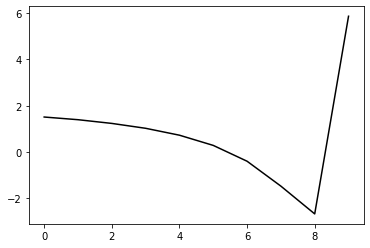

33000 0.23796341253582273
0.013974346576911035 0.45862177450836794 -0.24118064445319928 0.0966014314596421
[ 1.54338286  1.4097837   1.23311609  1.00372684  0.69644696  0.25352645
 -0.42721861 -1.49533764 -2.68077004  5.9005665 ]


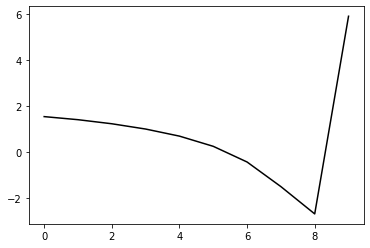

34000 0.24064473669560493
0.011235346641095167 0.45392455250016406 -0.2434354279394887 0.09360436371586948
[ 1.53328923  1.36789257  1.18471892  0.95560158  0.64735879  0.20085245
 -0.48591231 -1.55687211 -2.73795979  5.85782512]


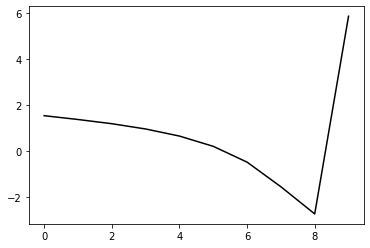

35000 0.21603463489749675
0.015932961723382502 0.44648362692467386 -0.24150722766994417 0.09752807651274362
[ 1.49747706  1.46267342  1.31140555  1.09429101  0.78925145  0.34211998
 -0.34682026 -1.42184671 -2.6103844   5.92076463]


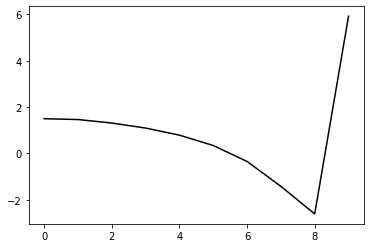

36000 0.2121405594494386
0.013496958971788991 0.4428274687188322 -0.24372531197781236 0.09517777429901926
[ 1.46562986  1.45213472  1.30087692  1.08810853  0.79459858  0.36272676
 -0.31068301 -1.37022096 -2.54085412  5.9327322 ]


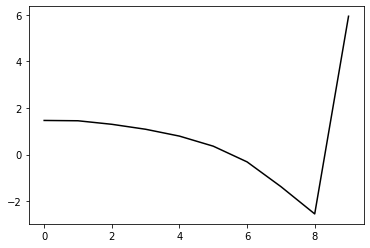

37000 0.25436912767255
0.017618514882474606 0.4365024379171392 -0.24350033001591226 0.09634866469375185
[ 1.52195634  1.47463495  1.30138085  1.09006313  0.79800001  0.36649594
 -0.30724234 -1.37256993 -2.55357182  5.92058275]


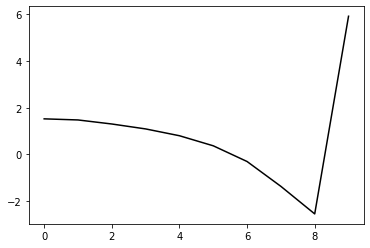

38000 0.2229949055140982
0.01150380501135341 0.4317062706393458 -0.24128486793994106 0.09787866858659952
[ 1.52125875  1.43277347  1.28714212  1.09042548  0.80247647  0.36566501
 -0.31838443 -1.39156534 -2.57527035  5.93157205]


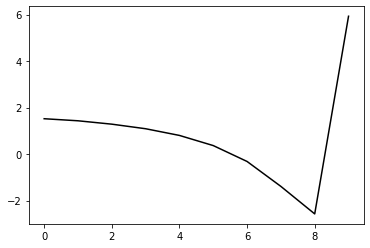

39000 0.28624291988327655
0.009356838123537905 0.4319914558632046 -0.2461681841658814 0.09272712298657054
[ 1.51258906  1.33923187  1.15970403  0.93837765  0.63720009  0.19968214
 -0.48048383 -1.55234763 -2.72690758  5.8615084 ]


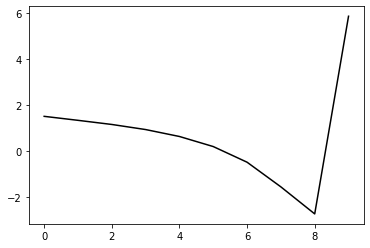

40000 0.32794360194863154
0.01706135250022717 0.4225645364823684 -0.24152903892614477 0.1004146605279978
[ 1.5710253   1.46310776  1.29892328  1.08729248  0.78981659  0.34815519
 -0.33539162 -1.40882107 -2.59709854  5.91522305]


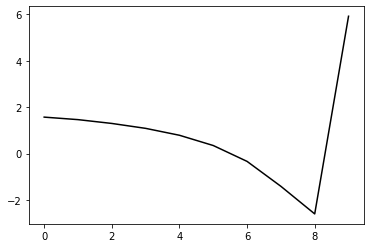

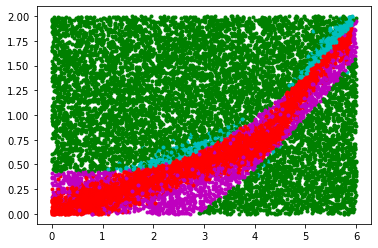

41000 0.2716163995773909
0.014776232066773169 0.42053473613687936 -0.2457220923900431 0.09668098699696481
[ 1.57354127  1.46592742  1.29607736  1.08331871  0.79021269  0.35887842
 -0.3136688  -1.37448196 -2.55026151  5.92065089]


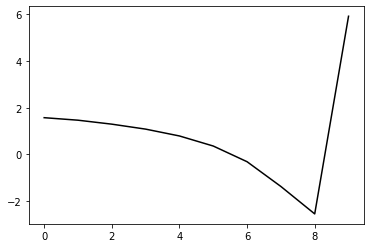

42000 0.21417143941421513
0.010361467186642522 0.42263222801540334 -0.24973543844986262 0.09557335431218443
[ 1.54361425  1.42691078  1.265193    1.04579745  0.73909124  0.28866821
 -0.405981   -1.48586331 -2.66024519  5.88458881]


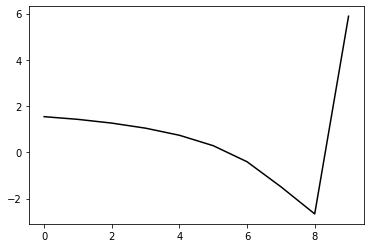

43000 0.28942232863273365
0.013976975240033952 0.41576073717689255 -0.24686309043562163 0.09933983265503266
[ 1.47961615  1.45067021  1.2988624   1.07877392  0.7719469   0.3198177
 -0.38177268 -1.47354227 -2.66050946  5.89382667]


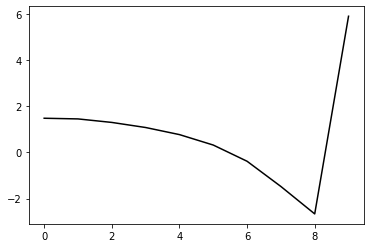

44000 0.3417293500961656
0.008477112838834984 0.41470140904233405 -0.249577825168927 0.0964131564124406
[ 1.42710377  1.35573536  1.21270185  1.00527862  0.70741731  0.26605043
 -0.4227907  -1.5076406  -2.69424306  5.8769033 ]


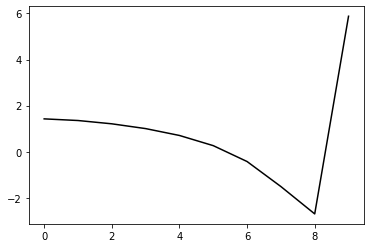

45000 0.20209206670149413
0.006365762060201421 0.4125488104429263 -0.2509360070975517 0.09527575518958328
[ 1.42665746  1.33847409  1.19982003  0.99865586  0.70652274  0.26751909
 -0.42215634 -1.51215116 -2.71001426  5.87391134]


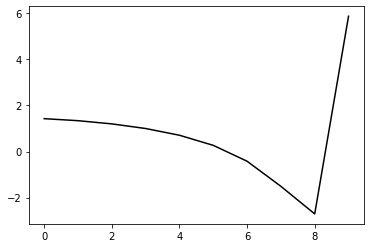

46000 0.2278441751219985
0.006434055674230791 0.409081932725721 -0.2503357521977037 0.09718113745583146
[ 1.45239342  1.37943903  1.24547182  1.04292761  0.74989973  0.31440591
 -0.37085826 -1.45971857 -2.66353253  5.88148823]


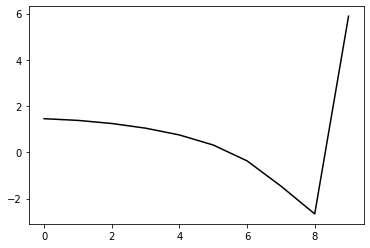

47000 0.1740383664837854
0.014106576546401366 0.40479466748407267 -0.25096879976687125 0.10034786676143108
[ 1.53831357  1.40429321  1.21429794  0.997083    0.70424976  0.27218294
 -0.40453303 -1.48307682 -2.69269519  5.89282327]


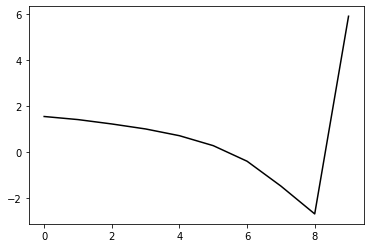

48000 0.1666879189931172
0.01052637474554786 0.4030924150712922 -0.25310679413377696 0.09827767718895229
[ 1.54403741  1.35211196  1.16915884  0.93784944  0.6159631   0.15117969
 -0.55499135 -1.65653189 -2.88737367  5.78971477]


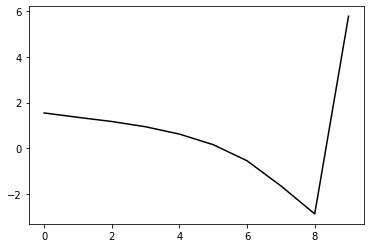

49000 0.2406484668467375
0.011352293003346324 0.4011013749169292 -0.2556784470515932 0.09896461037807142
[ 1.47606208  1.43658198  1.27543898  1.05043087  0.73992385  0.28302588
 -0.42654738 -1.53752294 -2.77973835  5.81024618]


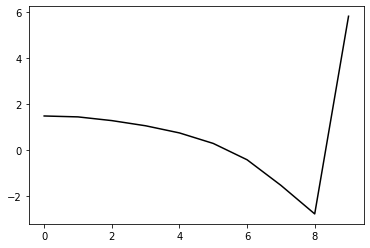

50000 0.18606251009454478
0.01161590074794712 0.3952389858468802 -0.25340657395307914 0.10118185999144406
[ 1.4606349   1.41928179  1.26247511  1.04135115  0.74163179  0.30047828
 -0.39674651 -1.50133459 -2.73624769  5.87060271]


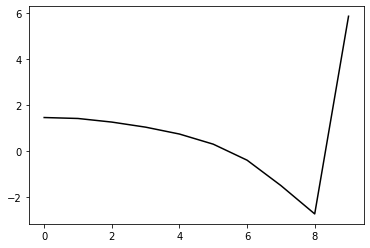

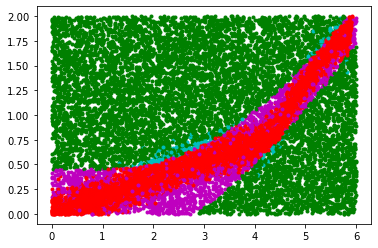

51000 0.2115742074194041
0.009489972141325331 0.3939731009143512 -0.2566309836596497 0.09813308583688096
[ 1.48014921  1.39754382  1.23686116  1.02650938  0.73709008  0.30740887
 -0.37080264 -1.4561199  -2.68029829  5.86664516]


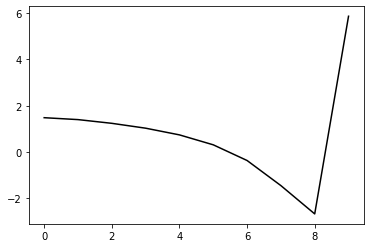

52000 0.2756669125898542
0.011246654409022406 0.38874004108968707 -0.25475663950309807 0.10008217554363225
[ 1.56779151  1.38232376  1.20766894  0.99382705  0.69206733  0.24352571
 -0.45519223 -1.56027342 -2.80941258  5.85435052]


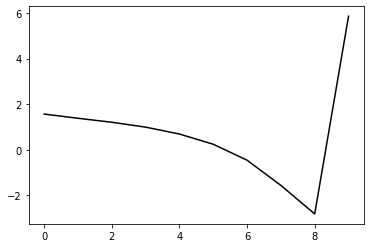

53000 0.2766227559159492
0.009257839266880976 0.3873432357607003 -0.2572363926173495 0.0966595272985652
[ 1.48088144  1.36245645  1.20859631  0.99727962  0.69642788  0.25120627
 -0.44285977 -1.53864982 -2.76711475  5.82791136]


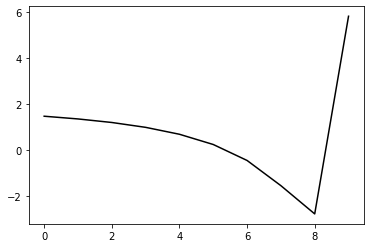

54000 0.2969325728937175
0.013853869645965551 0.38033191403113586 -0.255323966334497 0.09974409022879657
[ 1.52041799  1.41585885  1.23534669  1.02616478  0.74530446  0.3250594
 -0.34574776 -1.42112183 -2.63590113  5.9040679 ]


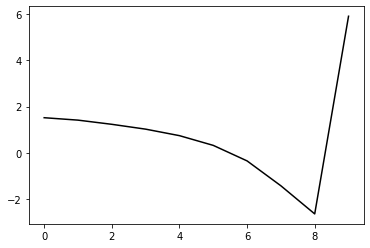

55000 0.2276280167908536
0.012158190280006583 0.3773696931421547 -0.25650023942607514 0.10187715834145869
[ 1.51109707  1.44839991  1.27405122  1.04983059  0.74397015  0.29597958
 -0.39372911 -1.48563178 -2.72712828  5.86836389]


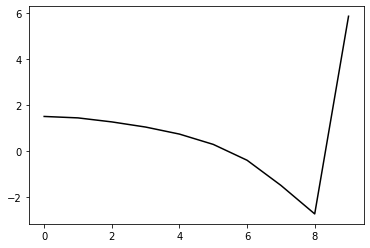

56000 0.26498101361488213
0.014592194789028866 0.3733527963159845 -0.2569926649631487 0.10256130736787288
[ 1.54197272  1.44714711  1.25735939  1.03289504  0.73312374  0.28927872
 -0.40226611 -1.49430928 -2.73409516  5.87193489]


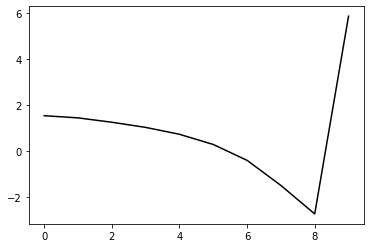

57000 0.2960881075197779
0.01740096530055673 0.36651608452458967 -0.2544762612204624 0.10408762327776636
[ 1.55302849  1.44588595  1.28157521  1.07280674  0.77428497  0.32388448
 -0.3798468  -1.48794689 -2.74078857  5.87673421]


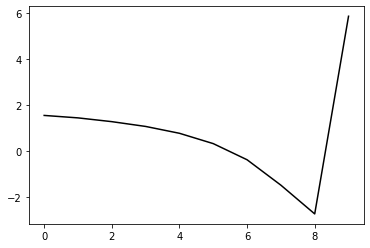

58000 0.23742278496718916
0.00759243610128652 0.37154189551859457 -0.2598482057836926 0.1027325154420048
[ 1.55208046  1.4639215   1.33069395  1.13179579  0.84765901  0.42303706
 -0.25193063 -1.3313613  -2.54232677  5.91479947]


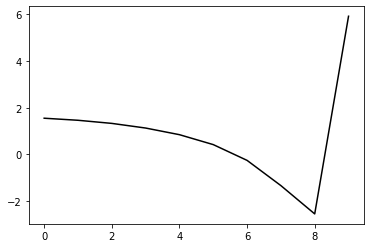

59000 0.2526404512163655
0.009306809135222171 0.3664580784487621 -0.2612431410927846 0.09817794309628419
[ 1.49431138  1.37366365  1.21305127  0.99615677  0.68906796  0.23973316
 -0.45375928 -1.55145416 -2.79253059  5.82349694]


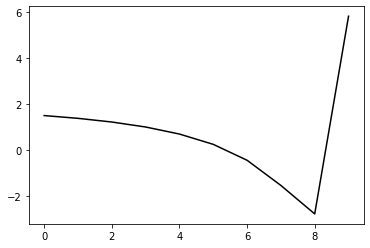

60000 0.25388703489940906
0.01120594873459777 0.36370978732431086 -0.261267588905471 0.10132065026094059
[ 1.52926409  1.47732403  1.33651523  1.12692848  0.82933563  0.3855346
 -0.30756962 -1.40327837 -2.6450026   5.89764247]


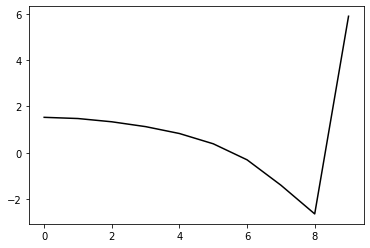

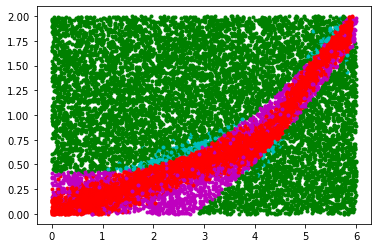

61000 0.2078760725407028
0.005997691139990136 0.36248553300916264 -0.26085657102609794 0.10279425648607055
[ 1.44751251  1.3992059   1.26076827  1.05043319  0.74601777  0.2982
 -0.39205521 -1.47294104 -2.67604066  5.87683771]


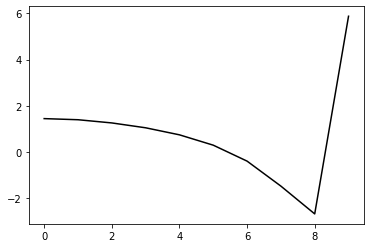

62000 0.17840778274215702
0.013238082398105465 0.3590834917932824 -0.26340477259892336 0.10055077488146706
[ 1.46806103  1.42307951  1.26303439  1.04724746  0.74643473  0.30440321
 -0.38254752 -1.46721795 -2.68535622  5.88510388]


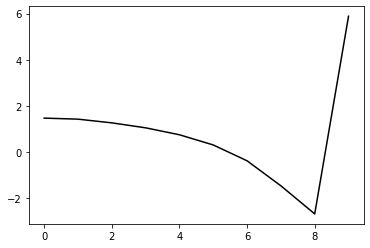

63000 0.2715011574206389
0.011560623342406966 0.3527395055528271 -0.2595986792008734 0.10413274783973488
[ 1.51389652  1.39254923  1.24602045  1.04380729  0.75272748  0.311363
 -0.37938684 -1.46011519 -2.6511426   5.90460415]


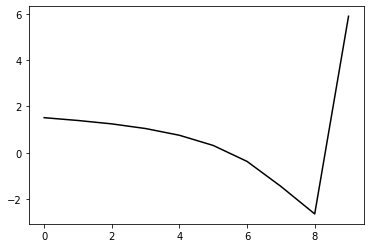

64000 0.2337475812533217
0.010197051245961705 0.3500866762263041 -0.26286533990203714 0.10076209730887892
[ 1.45111209  1.41356652  1.26947899  1.05444458  0.752073    0.31327572
 -0.36928627 -1.45168455 -2.65734189  5.89339432]


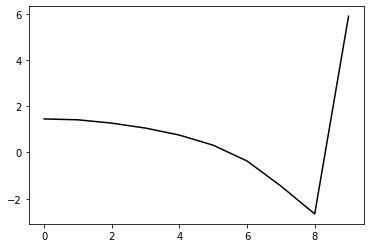

65000 0.27379039269815736
0.014841718625029613 0.34605731766090625 -0.2609557452290041 0.10591542544914405
[ 1.56423071  1.45208836  1.27423225  1.04563685  0.73672556  0.28637777
 -0.41121608 -1.50972892 -2.73055085  5.87073323]


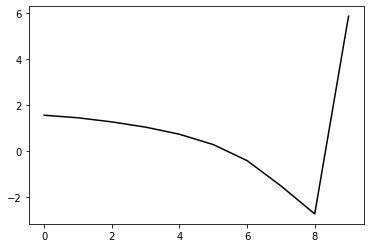

66000 0.243508850904041
0.017013593962462395 0.3386904914802121 -0.2596562526864606 0.10206114272801231
[ 1.56314091  1.47364966  1.30681957  1.08983541  0.79075135  0.34338156
 -0.36285492 -1.48111931 -2.7400601   5.85552752]


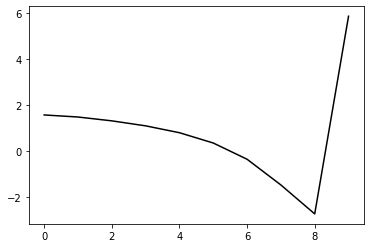

67000 0.21124282541785153
0.018135369984080333 0.3396209584467034 -0.26522784122214565 0.10003649329108817
[ 1.51810182  1.4912437   1.30713099  1.08065483  0.77396951  0.32393019
 -0.37758635 -1.49216666 -2.75460609  5.84881207]


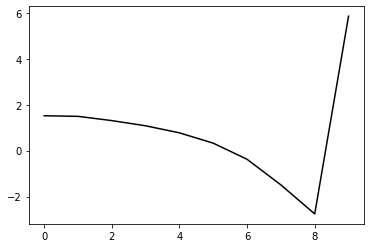

68000 0.2925282941349677
0.015614525058442076 0.3386697978219636 -0.266068925601159 0.10250004791997375
[ 1.55596158  1.44063804  1.26288769  1.03811575  0.72872474  0.27690111
 -0.42045184 -1.51448958 -2.73870701  5.8768155 ]


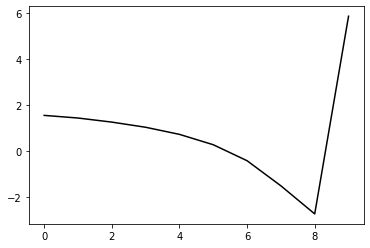

69000 0.25654108618746596
0.011481754166307982 0.33952531326414387 -0.2678228020787022 0.10382067154382921
[ 1.50802651  1.43628104  1.27050489  1.04781354  0.74535673  0.29991893
 -0.39485184 -1.48318251 -2.69291263  5.88475891]


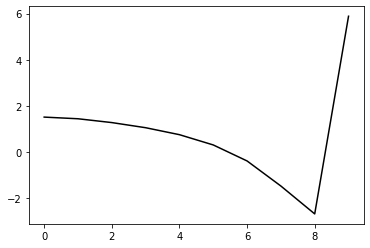

70000 0.2479829811366885
0.007364653608176083 0.3392227783399685 -0.26927211981854104 0.10118002149228686
[ 1.50458652  1.35184208  1.19776395  0.98175059  0.66521052  0.19463764
 -0.52892446 -1.65211275 -2.89282538  5.78679997]


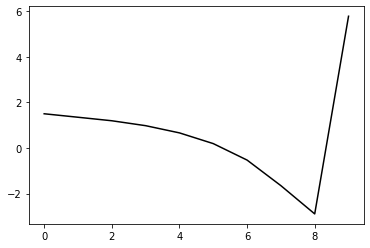

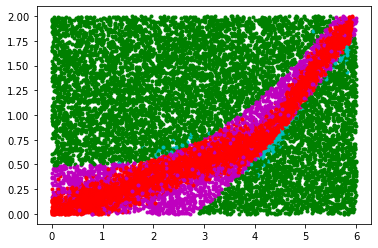

71000 0.19735894533995393
0.006950386170147782 0.33871083893681986 -0.27089191750911634 0.10256275955827833
[ 1.43803052  1.32863679  1.1762227   0.95893721  0.65167185  0.19766165
 -0.51154327 -1.62687248 -2.86062964  5.8325907 ]


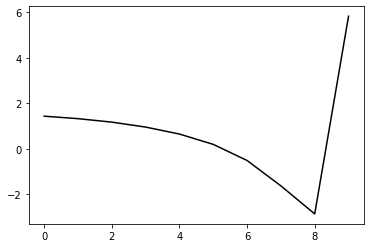

72000 0.24923431582646233
0.008560677409812796 0.33757081344965684 -0.2730332523731872 0.103280762762666
[ 1.47701204  1.35883042  1.19308688  0.96887334  0.6498017   0.18115515
 -0.5391436  -1.6660387  -2.91761267  5.77649014]


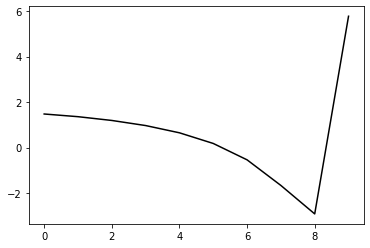

73000 0.17873997198584057
0.007412013926587111 0.3335043649520684 -0.27174400141717436 0.10473212679117835
[ 1.44382021  1.36020452  1.20548263  0.99096463  0.69030781  0.24337369
 -0.46304841 -1.5818536  -2.83003339  5.84087297]


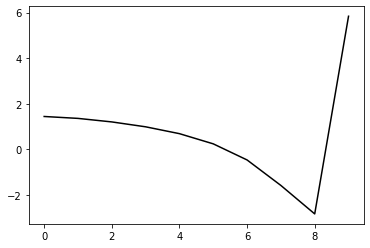

74000 0.25305967495403514
0.009988943503206154 0.33261809733985626 -0.2755610874565345 0.10358087662682361
[ 1.48321663  1.39538975  1.20979928  0.97931163  0.67868246  0.240798
 -0.45074479 -1.55966813 -2.81668304  5.847215  ]


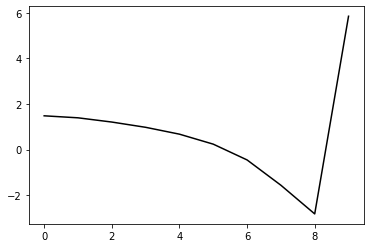

75000 0.2885931248689189
0.01596492459636773 0.3230789382151027 -0.2690295383421265 0.10887097828829818
[ 1.55654004  1.41822996  1.24433563  1.02491959  0.71857889  0.26506103
 -0.4380655  -1.54706823 -2.80114502  5.83775543]


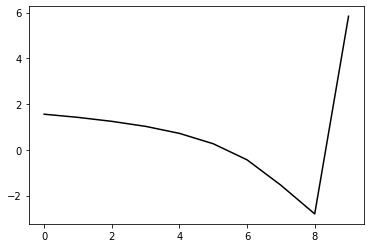

76000 0.22442774363414603
0.013141761486582698 0.32453596642140653 -0.2747386632015543 0.1054753314508939
[ 1.48606233  1.44162525  1.28678809  1.072461    0.77063774  0.32245508
 -0.37485121 -1.47538945 -2.71533834  5.86739137]


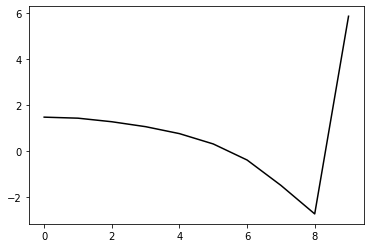

77000 0.22231912110183105
0.005207582956656754 0.32492118321787317 -0.2765183641806424 0.10380116163120176
[ 1.40565439  1.3090187   1.16423324  0.95460582  0.64893868  0.1906305
 -0.52097792 -1.63620065 -2.88369964  5.81844299]


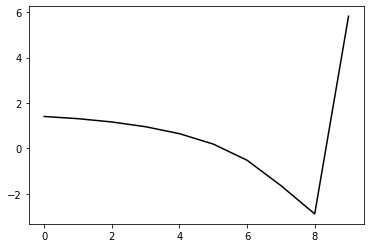

78000 0.23090292618260697
0.012365733555714875 0.32296915890028044 -0.2773561476400005 0.1079693855317102
[ 1.49427954  1.43744764  1.27411451  1.04977387  0.74029385  0.28222875
 -0.43463222 -1.56522083 -2.83282227  5.84371268]


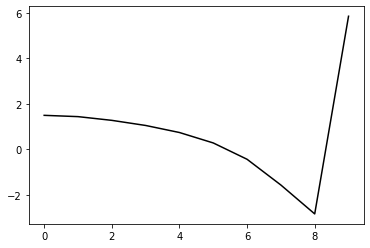

79000 0.19703935667956676
0.011644844696432694 0.3218899969543127 -0.279376235677963 0.10723358938267859
[ 1.50083725  1.3956576   1.21373837  0.98791903  0.67513689  0.21006384
 -0.51351999 -1.65098217 -2.92349165  5.80279474]


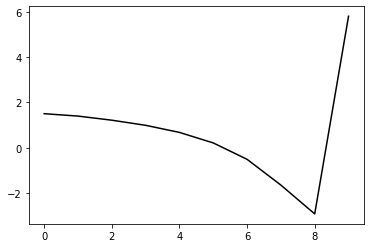

80000 0.2707421286620227
0.015221192318610225 0.3141461741273619 -0.27534717263030545 0.11135341187903638
[ 1.5231089   1.45002321  1.27794566  1.05273126  0.74744613  0.2921859
 -0.43116506 -1.58106277 -2.87785319  5.79784038]


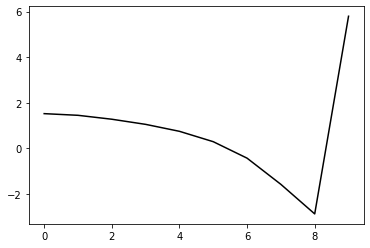

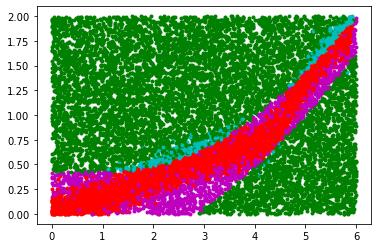

81000 0.22533733406732043
0.013676680899987246 0.314379271490901 -0.2792098662824093 0.10894220683911746
[ 1.4613768   1.42530405  1.26769658  1.0495079   0.74352881  0.28832866
 -0.42724514 -1.57126688 -2.87498692  5.83192108]


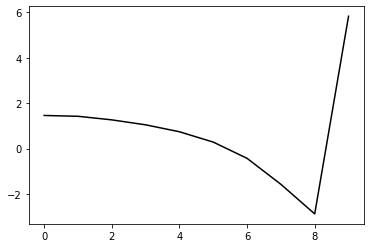

82000 0.18736193566923642
0.007620813736604387 0.31325798871514693 -0.2812053296941385 0.10668556371111501
[ 1.4496477   1.37581993  1.22639231  1.00312654  0.68718234  0.22484145
 -0.49304739 -1.63251497 -2.92999788  5.77051854]


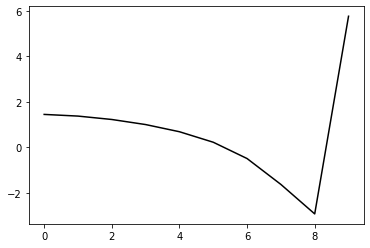

83000 0.16233063938879458
0.014675863520191273 0.30720982828451215 -0.2792177701261229 0.108134949323505
[ 1.57342003  1.45294344  1.27098831  1.04951919  0.74621551  0.29105465
 -0.4323819  -1.58624377 -2.90796475  5.80309946]


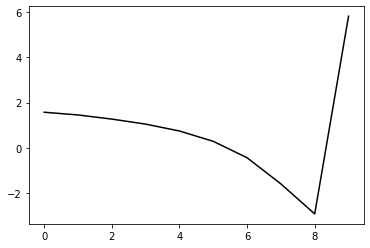

84000 0.2107013732326107
0.008318869002610085 0.3082657484712243 -0.28180951770280804 0.10583722945328072
[ 1.46719427  1.38738293  1.23980196  1.02468252  0.71262066  0.24737075
 -0.47418857 -1.6146939  -2.91484271  5.77639627]


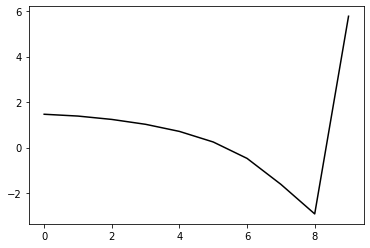

85000 0.24023414792499156
0.005841513218808152 0.3066476637941472 -0.2811039189909852 0.10921889086382303
[ 1.44492568  1.36380134  1.21227497  0.98781579  0.66679131  0.19776805
 -0.52199807 -1.65031416 -2.92328375  5.79004264]


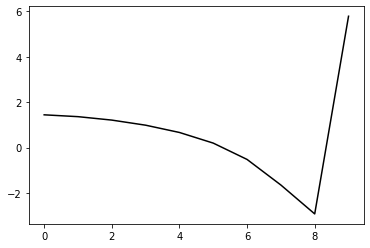

86000 0.3153728969579165
0.00948767697933089 0.30340704189231377 -0.2800143768541304 0.11110535008405831
[ 1.49175369  1.38057499  1.21383706  1.00269728  0.69901469  0.24020459
 -0.48014259 -1.61573032 -2.88640311  5.82710661]


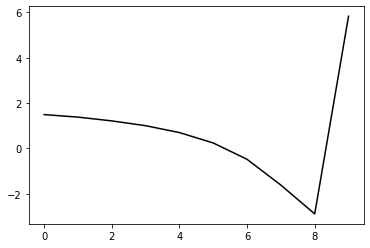

87000 0.21614701838012962
0.01051790666789112 0.30139696889174983 -0.2809334161602561 0.11006550095342323
[ 1.46572141  1.3865048   1.22896513  1.01577394  0.71222735  0.25603988
 -0.45984116 -1.59368288 -2.86635331  5.82980626]


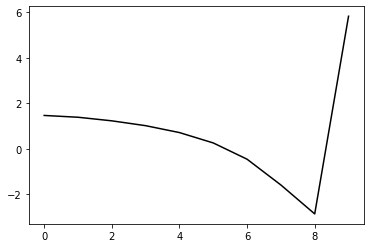

88000 0.20285855120058063
0.008081453935774374 0.30343195057134453 -0.2852559214854548 0.1085551799296597
[ 1.46728814  1.37135665  1.1978317   0.96358759  0.64809408  0.1874193
 -0.53010242 -1.66406577 -2.9301801   5.79397846]


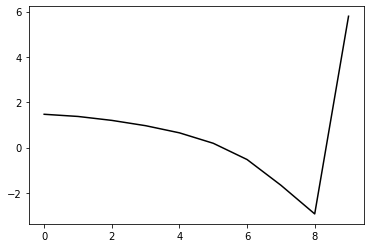

89000 0.2151152101300897
0.010202599856977575 0.2986801665337711 -0.28341665652593395 0.10888981093202871
[ 1.48409218  1.42839402  1.27603664  1.06194054  0.76525875  0.32082431
 -0.38647611 -1.5147654  -2.78643726  5.8514216 ]


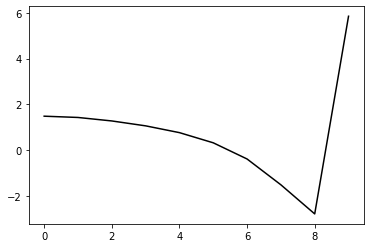

90000 0.25197117960482407
0.008312506955926132 0.29671745836084035 -0.2844555145649506 0.10882334058345527
[ 1.42277901  1.34599534  1.19383311  0.96608085  0.64065752  0.16870699
 -0.55220332 -1.68591769 -2.9651495   5.78865953]


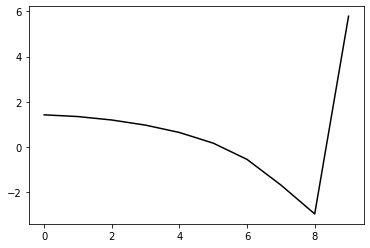

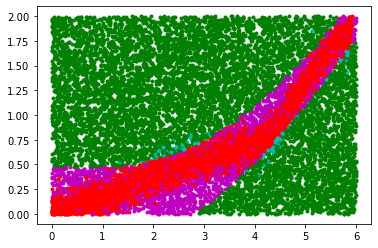

91000 0.31974240585960517
0.016915236346832015 0.28559111335677334 -0.2773304149623756 0.11261964194937844
[ 1.56316334  1.41767226  1.2374107   1.01350175  0.70626586  0.24283983
 -0.49208922 -1.6545276  -2.97482892  5.80038858]


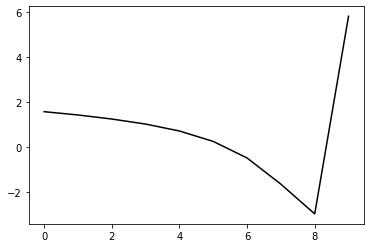

92000 0.3076008837180772
0.018685536281718394 0.2844717895864038 -0.27988485390568085 0.11129965471112738
[ 1.52139634  1.43770939  1.26266135  1.03661418  0.72275139  0.25727473
 -0.46751028 -1.61706141 -2.92747446  5.80667001]


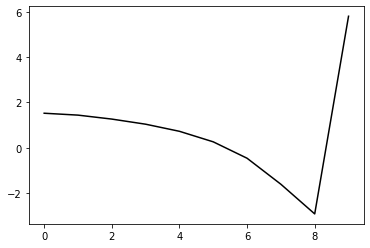

93000 0.27134723789439263
0.011652143212223591 0.28926270686304056 -0.28661895049043806 0.1070916094990599
[ 1.54902616  1.40836944  1.21240028  0.98515789  0.67705257  0.22119725
 -0.49074904 -1.62167656 -2.91178968  5.7815499 ]


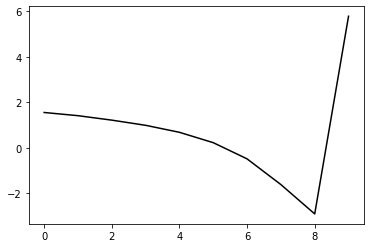

94000 0.2901348492203461
0.007766459022767526 0.2883955086149548 -0.28658781556717555 0.10719615603880454
[ 1.44919347  1.35631597  1.19769645  0.97745196  0.66781969  0.20767935
 -0.51224501 -1.65098274 -2.95370688  5.79090201]


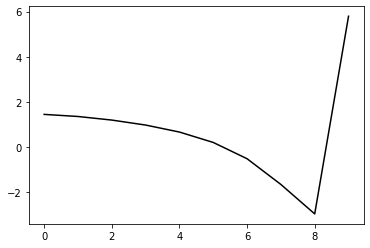

95000 0.3008177765097656
0.015820450170191836 0.28171349078097163 -0.2831838825191674 0.11056631394189831
[ 1.58491436  1.46292501  1.28601687  1.05088055  0.73094874  0.26667277
 -0.45678747 -1.60655951 -2.93232293  5.78415309]


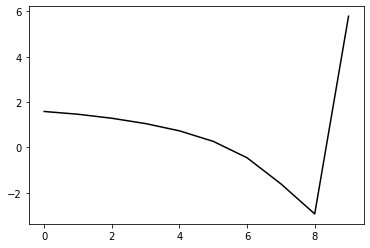

96000 0.29059950042279353
0.011518639543771157 0.28735513938830476 -0.28968333810260605 0.10896797145973793
[ 1.49265059  1.35771985  1.16886499  0.92589565  0.59966498  0.12853531
 -0.59320763 -1.72673819 -3.01675273  5.78186819]


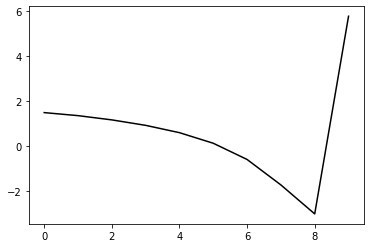

97000 0.21282073168533014
0.00993233496856562 0.2865804756333282 -0.2903336589854334 0.10948628861149917
[ 1.49490467  1.37950265  1.19934373  0.97145459  0.65381776  0.18497596
 -0.53687007 -1.66277972 -2.93010278  5.79220046]


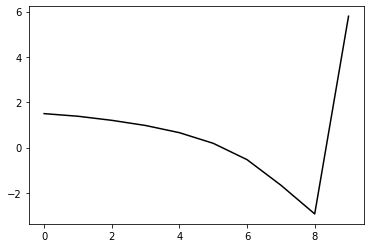

98000 0.23675581394956724
0.009473597093203983 0.285423617409933 -0.29103039900538213 0.11083272474592999
[ 1.50582016  1.41939291  1.25038045  1.02769803  0.71648282  0.25493365
 -0.46163414 -1.58260159 -2.83212389  5.83338038]


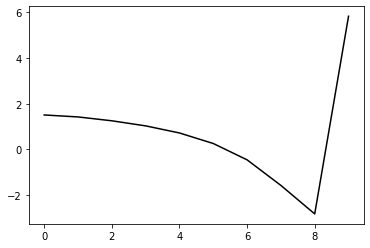

99000 0.20513868660639656
0.016406978336084916 0.27784957119263043 -0.28778041889772965 0.11327613656049625
[ 1.57040399  1.45314151  1.26530955  1.02132439  0.69435704  0.22030761
 -0.51108913 -1.65756781 -2.94969518  5.78591433]


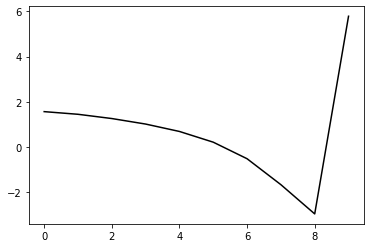

In [18]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if np.isnan(loss)==True: break
    for i in range (90):
        optimizer.apply_gradients(zip(gradients, [h]))
        if any(np.isnan(h.numpy()))==True: break
    for i in range (10):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
        if any(np.isnan(h.numpy()))==True: break
    if j%100==0: 
        print(j*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'c.')
            plt.plot(x_data1[i], y_data1[i], 'r.')
            plt.plot(x_data3[i], y_data3[i], 'm.')
        plt.show()

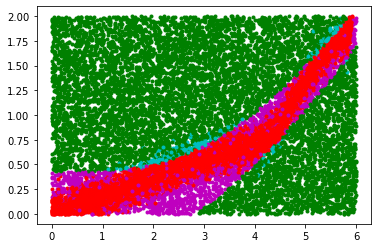

In [19]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()